Импорт библиотек

!pip

In [241]:
!pip install darts

In [242]:
# Основные
import numpy as np # Линейная алгебра
import pandas as pd
import random as rd # получение случайных значений
import datetime # формат даты
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
# Визуализация
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# Временные ряды
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from darts import TimeSeries
from darts.models import *
from darts.metrics import *
from darts.dataprocessing.transformers import Scaler

import xgboost as xgb
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers
# Настройки
import warnings
warnings.filterwarnings("ignore")

**Задать палитру для графиков**

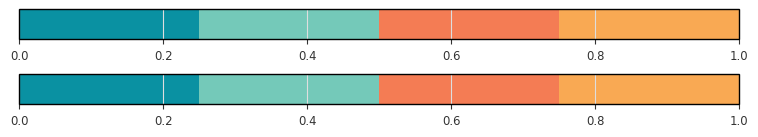

In [243]:
custom_colors = ['#0a91a2', '#74c9b9', '#f47c54', '#f9a953']
custom_cmap = ListedColormap(custom_colors)

col_1 = '#0a91a2'
col_2 = '#74c9b9'
col_3 = '#f47c54'
col_4 = '#f9a953'


fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = custom_cmap, norm=norm,orientation='horizontal')
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap = custom_cmap, norm=norm, orientation='horizontal')

Импорт данных

In [244]:
data_train = pd.read_excel("/content/drive/MyDrive/Train data.xlsx")
data_test = pd.read_excel('/content/drive/MyDrive/Test data.xlsx')

Поля данных

In [245]:
column_info = pd.read_excel("/content/drive/MyDrive/Columns.xlsx")
column_info


,Поля таблицы,Пояснение
0,Товар код,Уникальный код товара
1,Вид товара,"Товарная группа, имеющая определенные характер..."
2,Дата документа,Дата продажи товара
3,Отдел,Подразделение аптечной сети
4,Кол-во товара,Количество проданного товара


In [246]:
data_train.head()

,Товар код,Вид товара,Дата документа,Отдел,Кол-во товара
0,234,Лекарственные средства,2022-04-01,3,1.0
1,517,Лекарственные средства,2022-04-01,1,1.0
2,710,Лекарственные средства,2022-04-01,3,1.0
3,855,Лекарственные средства,2022-04-01,0,1.0
4,855,Лекарственные средства,2022-04-01,1,2.0


In [247]:
data_test.head()

,Товар код,Вид товара,Дата документа,Отдел,Кол-во товара
0,250,Лекарственные средства,2024-04-01,1,2.0
1,356,Лекарственные средства,2024-04-01,1,1.0
2,2989,Лекарственные средства,2024-04-01,1,1.0
3,3211,Лекарственные средства,2024-04-01,0,1.0
4,3490,Лекарственные средства,2024-04-01,2,1.0


Переименование колонок

In [248]:
data_train = data_train.rename(columns={"Товар код" : "product_code", "Вид товара" : "type_of_product", "Дата документа" : "date_of_sale", "Отдел" : "pharmacy_id", "Кол-во товара" : "quantity_sale"})

In [249]:
data_train.head()

,product_code,type_of_product,date_of_sale,pharmacy_id,quantity_sale
0,234,Лекарственные средства,2022-04-01,3,1.0
1,517,Лекарственные средства,2022-04-01,1,1.0
2,710,Лекарственные средства,2022-04-01,3,1.0
3,855,Лекарственные средства,2022-04-01,0,1.0
4,855,Лекарственные средства,2022-04-01,1,2.0


In [250]:
data_test = data_test.rename(columns={"Товар код" : "product_code", "Вид товара" : "type_of_product", "Дата документа" : "date_of_sale", "Отдел" : "pharmacy_id", "Кол-во товара" : "quantity_sale"})

In [251]:
data_test.head()

,product_code,type_of_product,date_of_sale,pharmacy_id,quantity_sale
0,250,Лекарственные средства,2024-04-01,1,2.0
1,356,Лекарственные средства,2024-04-01,1,1.0
2,2989,Лекарственные средства,2024-04-01,1,1.0
3,3211,Лекарственные средства,2024-04-01,0,1.0
4,3490,Лекарственные средства,2024-04-01,2,1.0


Информация о данных

In [252]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359435 entries, 0 to 359434
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_code     359435 non-null  int64         
 1   type_of_product  359435 non-null  object        
 2   date_of_sale     359435 non-null  datetime64[ns]
 3   pharmacy_id      359435 non-null  int64         
 4   quantity_sale    359435 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 13.7+ MB


Проверка на пропущенные значения

In [253]:
data_train.isnull().sum()

,0
product_code,0
type_of_product,0
date_of_sale,0
pharmacy_id,0
quantity_sale,0


Описание данных

In [254]:
data_train.describe()

,product_code,date_of_sale,pharmacy_id,quantity_sale
count,3.594350e+05,359435,359435.000000,359435.000000
mean,1.275539e+06,2023-03-26 18:20:45.094106112,1.849255,1.816018
min,2.700000e+01,2022-04-01 00:00:00,0.000000,0.000000
25%,1.292340e+05,2022-09-27 00:00:00,1.000000,1.000000
50%,2.090210e+05,2023-03-19 00:00:00,2.000000,1.000000
75%,2.578800e+05,2023-09-22 00:00:00,3.000000,2.000000
max,1.010000e+09,2024-03-31 00:00:00,4.000000,144.000000
std,9.502040e+06,NaN,1.368591,3.163309


Преобразование данных, похожих на дату/время в представление "datetime"

In [255]:
data_train.date_of_sale = pd.to_datetime(data_train.date_of_sale)
data_test.date_of_sale = pd.to_datetime(data_test.date_of_sale)


**Продажи товаров в категориях**

Распределение товаров в категориях

<BarContainer object of 15 artists>

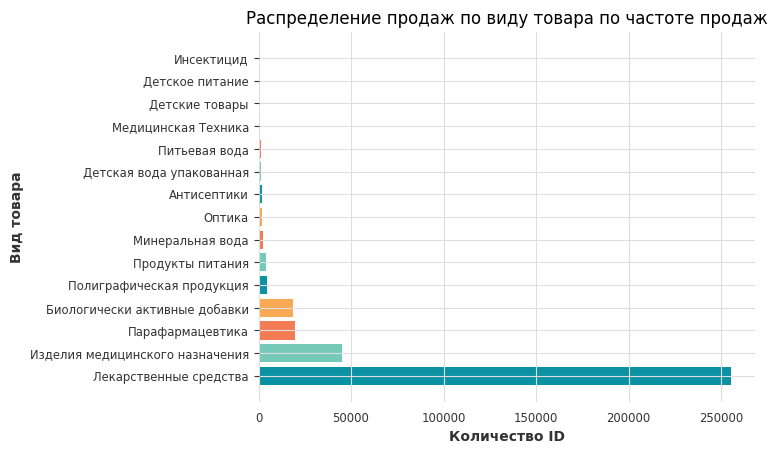

In [256]:
t = data_train["type_of_product"].value_counts()
plt.ylabel('Вид товара')
plt.xlabel('Количество ID')
plt.title('Распределение продаж по виду товара по частоте продаж')
plt.barh(width=t, y=t.index, color=custom_colors)

In [257]:
t

,count
type_of_product,
Лекарственные средства,255278
Изделия медицинского назначения,45268
Парафармацевтика,19648
Биологически активные добавки,18660
Полиграфическая продукция,4631
Продукты питания,4308
Минеральная вода,2556
Оптика,1984
Антисептики,1674


Распределение продаж в категориях


In [258]:
s = data_train.groupby('type_of_product')
s1 = s['quantity_sale'].sum()
s2 = data_train["type_of_product"]

<BarContainer object of 15 artists>

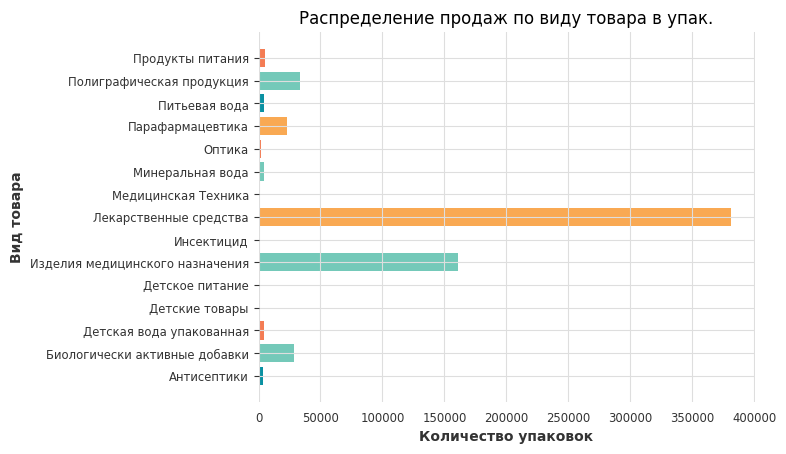

In [259]:
plt.ylabel('Вид товара')
plt.xlabel('Количество упаковок')
plt.title('Распределение продаж по виду товара в упак.')
plt.barh(width=s1.values, y=s1.index, color=custom_colors)

In [260]:
s1

,quantity_sale
type_of_product,
Антисептики,3452.000
Биологически активные добавки,28436.433
Детская вода упакованная,4180.000
Детские товары,905.000
Детское питание,942.000
Изделия медицинского назначения,161108.345
Инсектицид,25.000
Лекарственные средства,381160.028
Медицинская Техника,950.000


Вывод: Самые продаваемые категории товаров : Лекарственные средства, Изделия медицинского назначения, и Биологически активные добавки к пище. Полиграфическая продукция не учитывается - это фасовочные пакеты

# Продажи товаров по подразделениям

<BarContainer object of 5 artists>

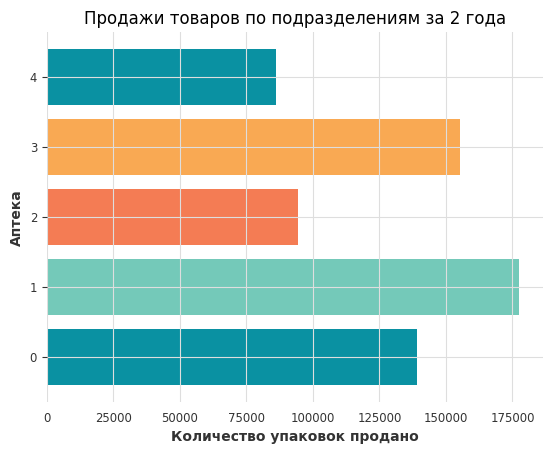

In [261]:
p = data_train.groupby('pharmacy_id')
p1 = p['quantity_sale'].sum()

p2 = data_train['pharmacy_id']

plt.ylabel('Аптека')
plt.xlabel('Количество упаковок продано')
plt.title('Продажи товаров по подразделениям за 2 года')
plt.barh(width=p1.values, y=p1.index, color=custom_colors)

Вывод: Аптеки с кодами "1", "0", и "3" самые результативные из группы по продажам товаров аптечного ассортимента

**Разделение датасета по подразделениям**

In [262]:
#Тренировочные данные
p_id_0 = 0
dtr_0 = data_train[data_train['pharmacy_id'] == p_id_0]

p_id_1 = 1
dtr_1 = data_train[data_train['pharmacy_id'] == p_id_1]

p_id_2 = 2
dtr_2 = data_train[data_train['pharmacy_id'] == p_id_2]

p_id_3 = 3
dtr_3 = data_train[data_train['pharmacy_id'] == p_id_3]

p_id_4 = 4
dtr_4 = data_train[data_train['pharmacy_id'] == p_id_4]

In [263]:
#Тестовые данные
p_id_0 = 0
dtst_0 = data_test[data_test['pharmacy_id'] == p_id_0]

p_id_1 = 1
dtst_1 = data_test[data_test['pharmacy_id'] == p_id_1]

p_id_2 = 2
dtst_2 = data_test[data_test['pharmacy_id'] == p_id_2]

p_id_3 = 3
dtst_3 = data_test[data_test['pharmacy_id'] == p_id_3]

p_id_4 = 4
dtst_4 = data_test[data_test['pharmacy_id'] == p_id_4]

**Введение искомого кода товара для прогнозирования**




In [264]:
#Ввод кода товара
kod_1 = 180857
#Отбор и формирование датасета по коду товара в каждом отдельном подразделении в тренировочной выборке
dtr_0_1 = dtr_0[dtr_0['product_code'] == kod_1]
dtr_1_1 = dtr_1[dtr_1['product_code'] == kod_1]
dtr_2_1 = dtr_2[dtr_2['product_code'] == kod_1]
dtr_3_1 = dtr_3[dtr_3['product_code'] == kod_1]
dtr_4_1 = dtr_4[dtr_4['product_code'] == kod_1]

In [265]:
#Отбор и формирование датасета по коду товара в каждом отдельном подразделении в тестовой выборке
dtst_0_1 = dtst_0[dtst_0['product_code'] == kod_1]
dtst_1_1 = dtst_1[dtst_1['product_code'] == kod_1]
dtst_2_1 = dtst_2[dtst_2['product_code'] == kod_1]
dtst_3_1 = dtst_3[dtst_3['product_code'] == kod_1]
dtst_4_1 = dtst_4[dtst_4['product_code'] == kod_1]

In [266]:
#Проверка сформированного датасета
dtr_0_1.head()


,product_code,type_of_product,date_of_sale,pharmacy_id,quantity_sale
1136,180857,Лекарственные средства,2022-04-04,0,6.0
2196,180857,Лекарственные средства,2022-04-06,0,3.0
2673,180857,Лекарственные средства,2022-04-07,0,1.0
4720,180857,Лекарственные средства,2022-04-12,0,3.0
5298,180857,Лекарственные средства,2022-04-13,0,2.0


Снижение частотности ряда со дня до месяца в суммовом показателе

In [267]:
#Аптека №0
df0 = pd.DataFrame(dtr_0_1)
df0.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )
df0['date_of_sale'] = pd.to_datetime(df0['date_of_sale'])
df0.set_index('date_of_sale', inplace = True)
df0_r = df0.resample('M').sum()
df0_r.head()

,quantity_sale
date_of_sale,
2022-04-30,24.0
2022-05-31,30.0
2022-06-30,61.0
2022-07-31,55.0
2022-08-31,72.0


In [268]:
#Аптека №1
df1 = pd.DataFrame(dtr_1_1)
df1.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )
df1['date_of_sale'] = pd.to_datetime(df1['date_of_sale'])
df1.set_index('date_of_sale', inplace = True)
df1_r = df1.resample('M').sum()

df1_r.head()

,quantity_sale
date_of_sale,
2022-04-30,116.0
2022-05-31,80.0
2022-06-30,269.0
2022-07-31,951.0
2022-08-31,637.0


In [269]:
#Аптека №2
df2 = pd.DataFrame(dtr_2_1)
df2.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )
df2['date_of_sale'] = pd.to_datetime(df2['date_of_sale'])
df2.set_index('date_of_sale', inplace = True)
df2_r = df2.resample('M').sum()

df2_r.head()

,quantity_sale
date_of_sale,
2022-05-31,14.0
2022-06-30,38.0
2022-07-31,40.0
2022-08-31,26.0
2022-09-30,61.0


In [270]:
#Аптека №3
df3 = pd.DataFrame(dtr_3_1)
df3.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )
df3['date_of_sale'] = pd.to_datetime(df3['date_of_sale'])
df3.set_index('date_of_sale', inplace = True)
df3_r = df3.resample('M').sum()

df3_r.head()

,quantity_sale
date_of_sale,
2022-07-31,6.0
2022-08-31,0.0
2022-09-30,0.0
2022-10-31,45.0
2022-11-30,20.0


In [271]:
#Аптека №4
df4 = pd.DataFrame(dtr_4_1)
df4.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )
df4['date_of_sale'] = pd.to_datetime(df4['date_of_sale'])
df4.set_index('date_of_sale', inplace = True)
df4_r = df4.resample('M').sum()

df4_r.head()

,quantity_sale
date_of_sale,
2022-04-30,11.0
2022-05-31,19.0
2022-06-30,137.0
2022-07-31,157.0
2022-08-31,144.0


**Поиск выбросов**

Функция для фильтра Хэмпеля

In [272]:
def hampel(y, window_size, simg=3):
    n = len(y)
    new_y = y.copy()
    k = 1.4826
    idx = []

    for i in range((window_size),(n - window_size)):
        r_median = np.median(y[(i - window_size):(i + window_size)]) #скользящая медиана
        r_mad  = np.median(np.abs(y[(i - window_size):(i + window_size)] - r_median)) #скользящий MAD
        if (np.abs(y[i] - r_median) > simg * r_mad):
            new_y[i] = r_median #замена выброса
            idx.append(i)

    return new_y, idx

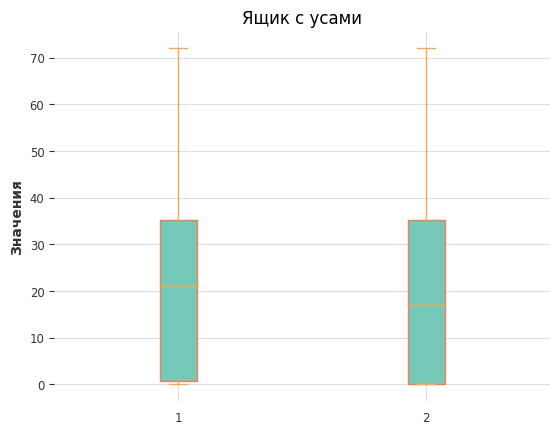

In [273]:
new_y, outliers = hampel(df0_r.quantity_sale, 3)
df0_r['quantity_sale_new'] = new_y

plt.boxplot(df0_r, patch_artist=True,
            boxprops=dict(facecolor=col_2, color=col_3),
            capprops=dict(color=col_4),
            whiskerprops=dict(color=col_4),
            flierprops=dict(color=col_4, markeredgecolor=col_4),
            medianprops=dict(color=col_4),
            )
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

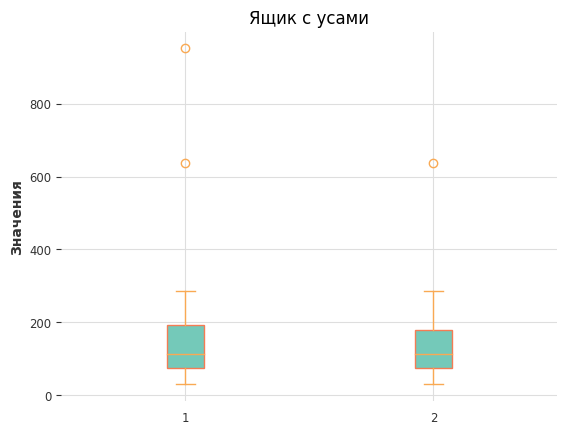

In [274]:
new_y, outliers = hampel(df1_r.quantity_sale, 3)
df1_r['quantity_sale_new'] = new_y

plt.boxplot(df1_r, patch_artist=True,
            boxprops=dict(facecolor=col_2, color=col_3),
            capprops=dict(color=col_4),
            whiskerprops=dict(color=col_4),
            flierprops=dict(color=col_4, markeredgecolor=col_4),
            medianprops=dict(color=col_4),
            )
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

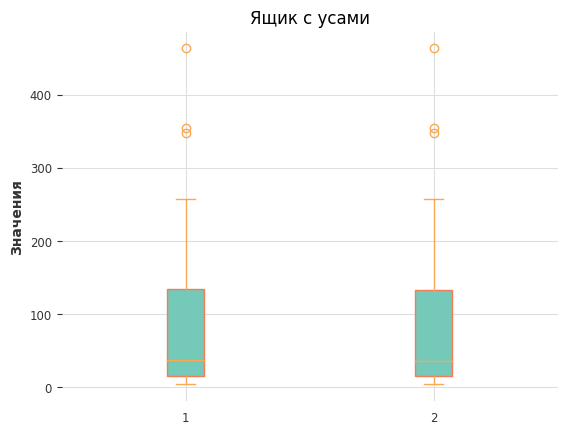

In [275]:
new_y, outliers = hampel(df2_r.quantity_sale, 3)
df2_r['quantity_sale_new'] = new_y

plt.boxplot(df2_r, patch_artist=True,
            boxprops=dict(facecolor=col_2, color=col_3),
            capprops=dict(color=col_4),
            whiskerprops=dict(color=col_4),
            flierprops=dict(color=col_4, markeredgecolor=col_4),
            medianprops=dict(color=col_4),
            )
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

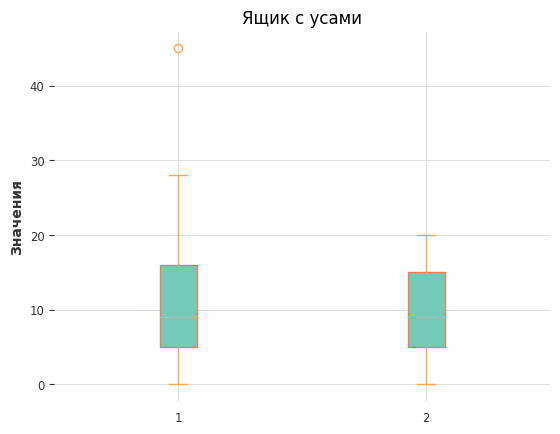

In [276]:
new_y, outliers = hampel(df3_r.quantity_sale, 3)
df3_r['quantity_sale_new'] = new_y

plt.boxplot(df3_r, patch_artist=True,
            boxprops=dict(facecolor=col_2, color=col_3),
            capprops=dict(color=col_4),
            whiskerprops=dict(color=col_4),
            flierprops=dict(color=col_4, markeredgecolor=col_4),
            medianprops=dict(color=col_4),
            )
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

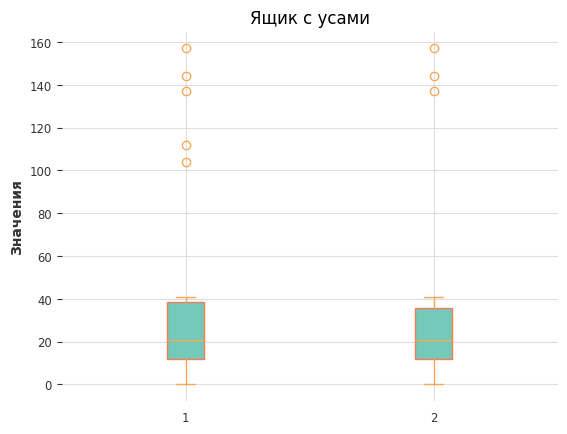

In [277]:
new_y, outliers = hampel(df4_r.quantity_sale, 3)
df4_r['quantity_sale_new'] = new_y

plt.boxplot(df4_r, patch_artist=True,
            boxprops=dict(facecolor=col_2, color=col_3),
            capprops=dict(color=col_4),
            whiskerprops=dict(color=col_4),
            flierprops=dict(color=col_4, markeredgecolor=col_4),
            medianprops=dict(color=col_4),
            )
plt.ylabel('Значения')
plt.title('Ящик с усами')
plt.show()

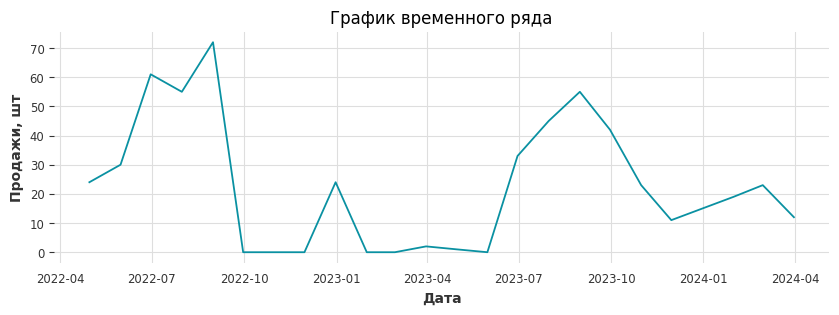

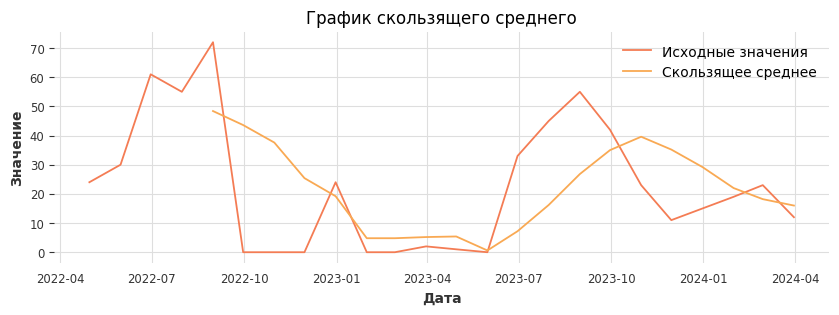

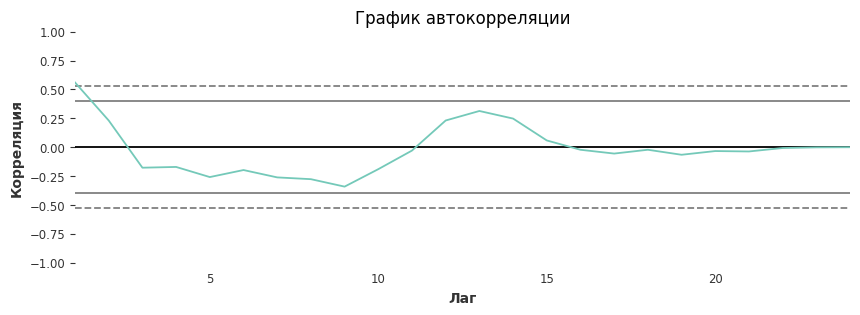

In [278]:

# График временного ряда
plt.figure(figsize=(10,3))
plt.plot(df0_r.index, df0_r["quantity_sale"], color = '#0a91a2')
plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title("График временного ряда")
plt.show()

# График скользящего среднего
plt.figure(figsize=(10,3))
rolling_mean = df0_r["quantity_sale"].rolling(window=5).mean()
plt.plot(df0_r.index, df0_r["quantity_sale"], label="Исходные значения", color = col_3)
plt.plot(df0_r.index, rolling_mean, label="Скользящее среднее", color = col_4)
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего")
plt.legend()
plt.show()

# График автокорреляции
plt.figure(figsize=(10,3))
pd.plotting.autocorrelation_plot(df0_r["quantity_sale"], color = col_2)
plt.xlabel("Лаг")
plt.ylabel("Корреляция")
plt.title("График автокорреляции")
plt.show()



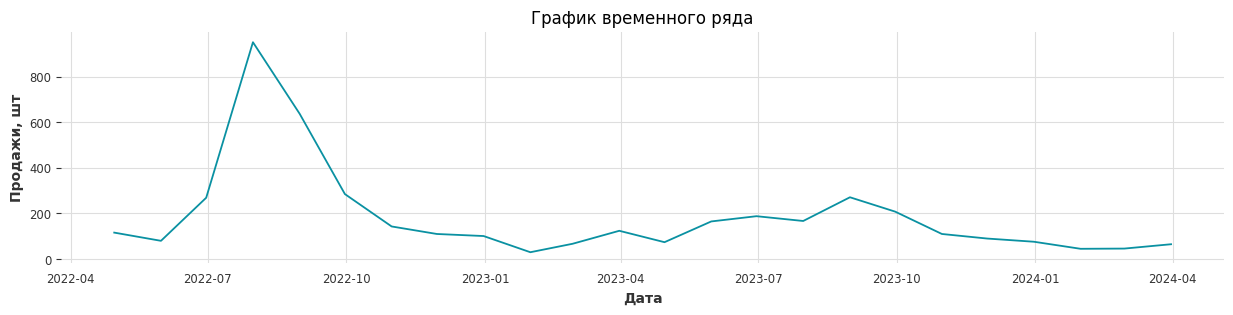

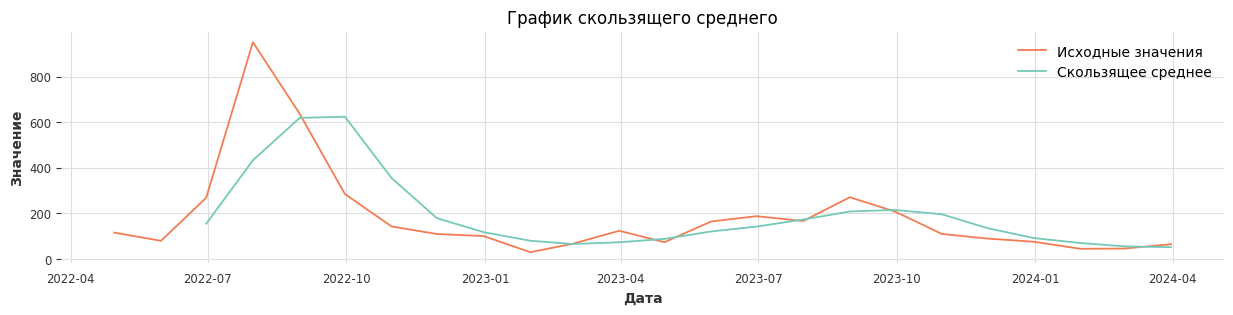

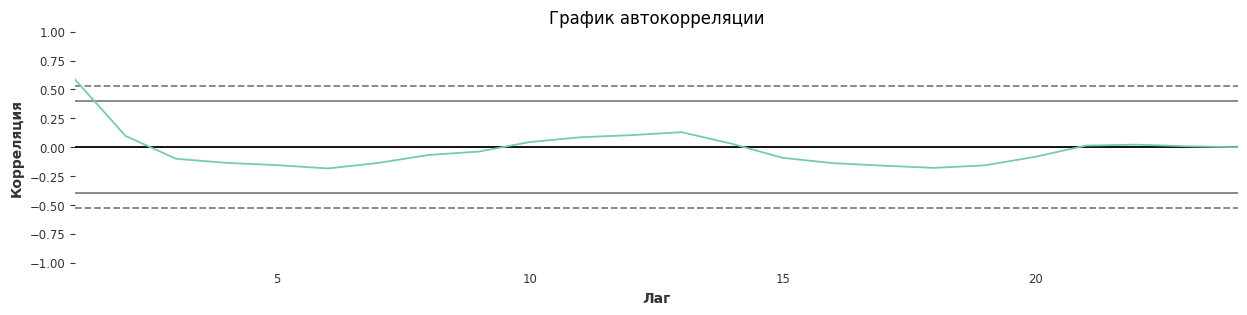

In [279]:
# График временного ряда
plt.figure(figsize=(15,3))
plt.plot(df1_r.index, df1_r["quantity_sale"], color = '#0a91a2')
plt.xlabel("Дата")
plt.ylabel("Продажи, шт")
plt.title("График временного ряда")
plt.show()

# График скользящего среднего
plt.figure(figsize=(15,3))
rolling_mean = df1_r["quantity_sale"].rolling(window=3).mean()
plt.plot(df1_r.index, df1_r["quantity_sale"], label="Исходные значения", color = col_3)
plt.plot(df1_r.index, rolling_mean, label="Скользящее среднее", color = col_2)
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего")
plt.legend()
plt.show()

# График автокорреляции
plt.figure(figsize=(15,3))
pd.plotting.autocorrelation_plot(df1_r["quantity_sale"], color = col_2)
plt.xlabel("Лаг")
plt.ylabel("Корреляция")
plt.title("График автокорреляции")
plt.show()




**Тестирование на стационарность ряда**



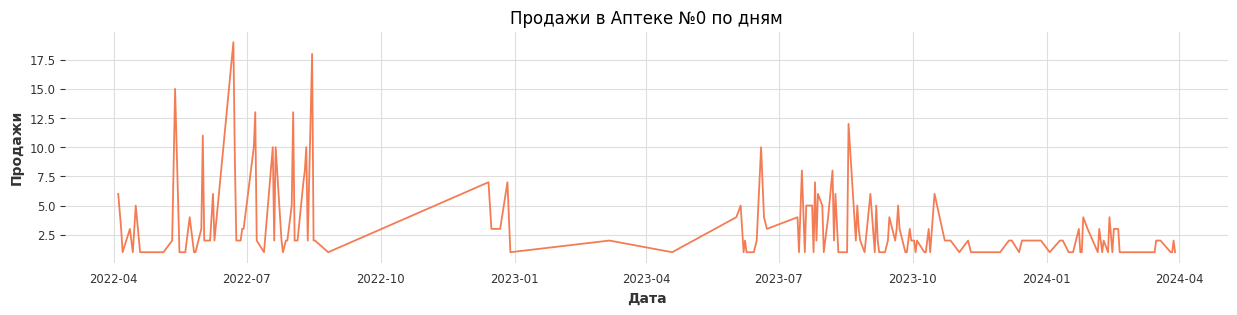

ADF Statistic: -2.384863
p-value: 0.146054
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


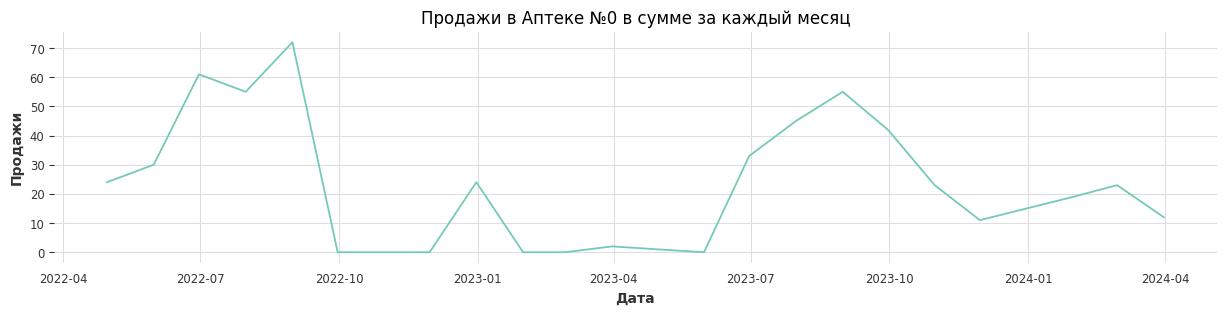

ADF Statistic: -3.605556
p-value: 0.005656
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


In [280]:
plt.figure(figsize=(15,3))
plt.plot(dtr_0_1['date_of_sale'], dtr_0_1['quantity_sale'], color= col_3)
plt.title('Продажи в Аптеке №0 по дням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dtr_0_1['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15,3))
plt.plot(df0_r.index, df0_r['quantity_sale'], color= col_2)
plt.title('Продажи в Аптеке №0 в сумме за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(df0_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

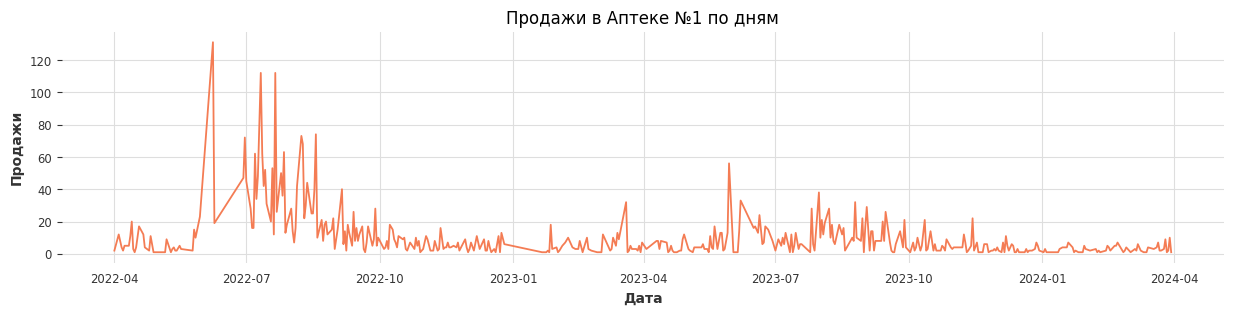

ADF Statistic: -2.115781
p-value: 0.238217
Critical Values:
	1%: -3.446
	5%: -2.869
	10%: -2.571


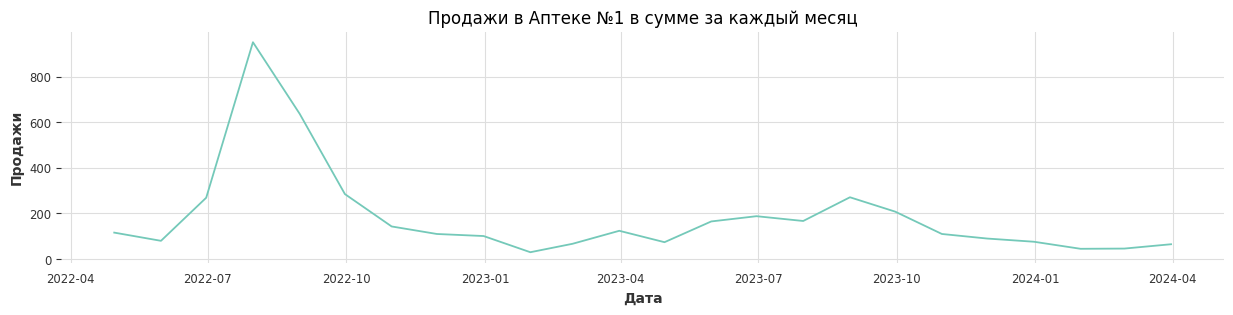

ADF Statistic: -6.790175
p-value: 0.000000
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [281]:
plt.figure(figsize=(15,3))
plt.plot(dtr_1_1['date_of_sale'], dtr_1_1['quantity_sale'], color= col_3)
plt.title('Продажи в Аптеке №1 по дням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dtr_1_1['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15,3))
plt.plot(df1_r.index, df1_r['quantity_sale'], color= col_2)
plt.title('Продажи в Аптеке №1 в сумме за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(df1_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

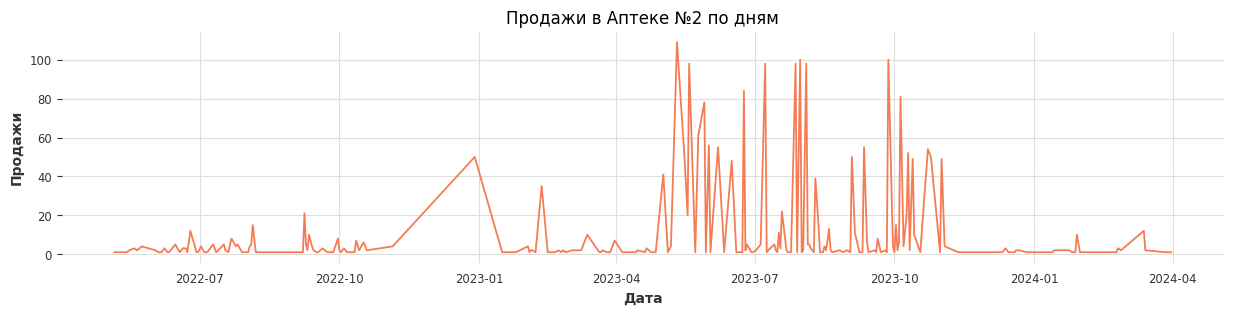

ADF Statistic: -3.418335
p-value: 0.010349
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


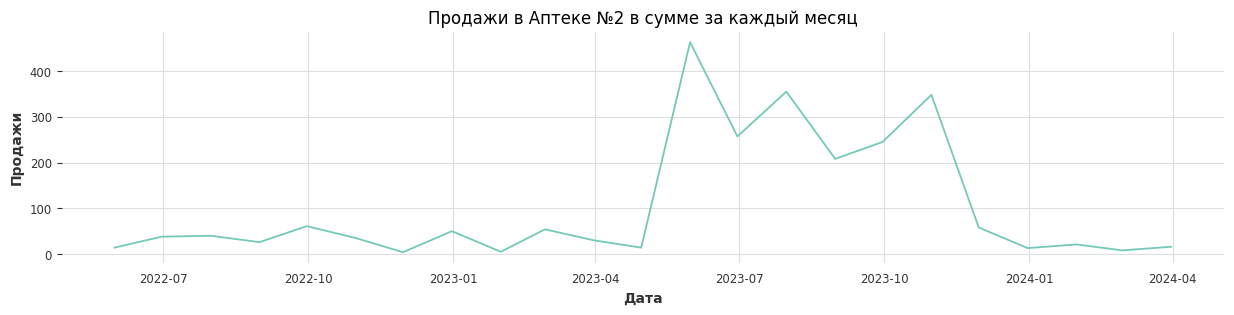

ADF Statistic: -2.519521
p-value: 0.110797
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


In [282]:
plt.figure(figsize=(15,3))
plt.plot(dtr_2_1['date_of_sale'], dtr_2_1['quantity_sale'], color= col_3)
plt.title('Продажи в Аптеке №2 по дням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dtr_2_1['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15,3))
plt.plot(df2_r.index, df2_r['quantity_sale'], color= col_2)
plt.title('Продажи в Аптеке №2 в сумме за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(df2_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

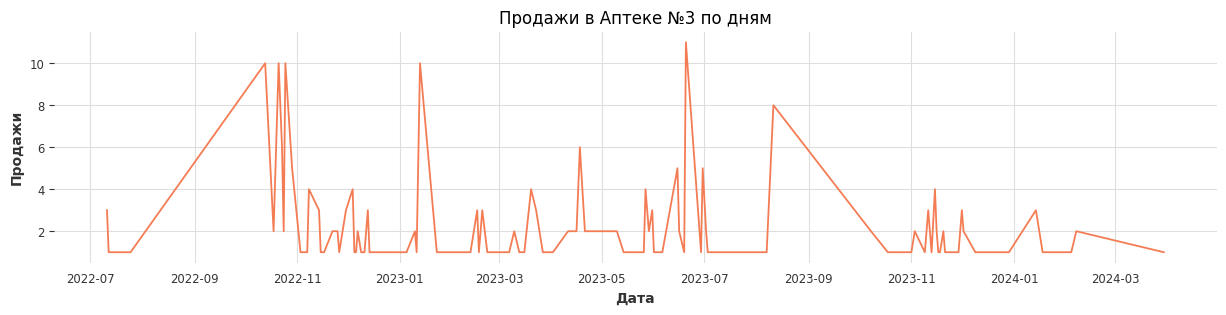

ADF Statistic: -10.432615
p-value: 0.000000
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580


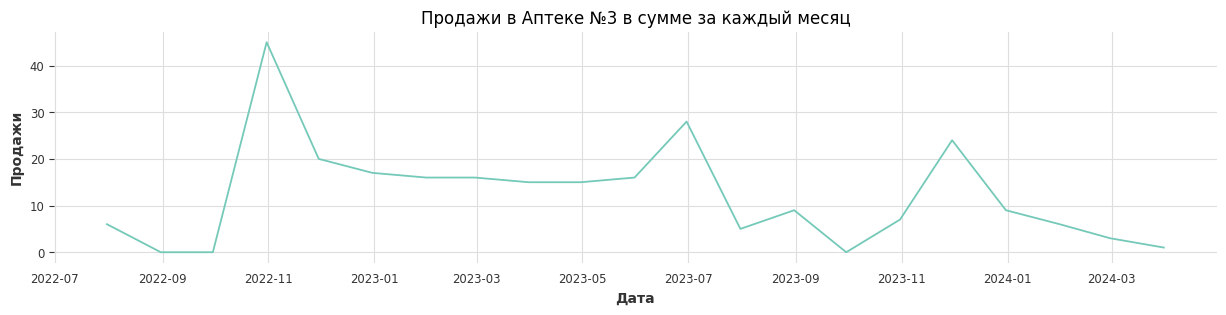

ADF Statistic: -1.261388
p-value: 0.646647
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [283]:
plt.figure(figsize=(15,3))
plt.plot(dtr_3_1['date_of_sale'], dtr_3_1['quantity_sale'], color= col_3)
plt.title('Продажи в Аптеке №3 по дням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dtr_3_1['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15,3))
plt.plot(df3_r.index, df3_r['quantity_sale'], color= col_2)
plt.title('Продажи в Аптеке №3 в сумме за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(df3_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

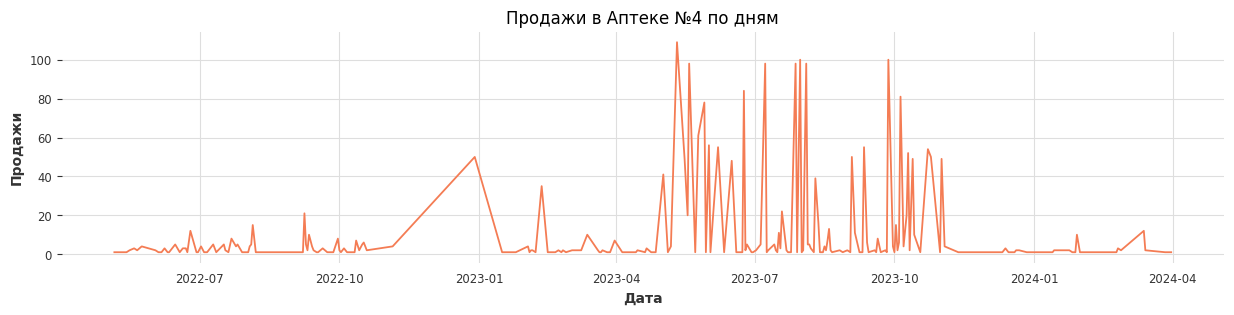

ADF Statistic: -3.418335
p-value: 0.010349
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


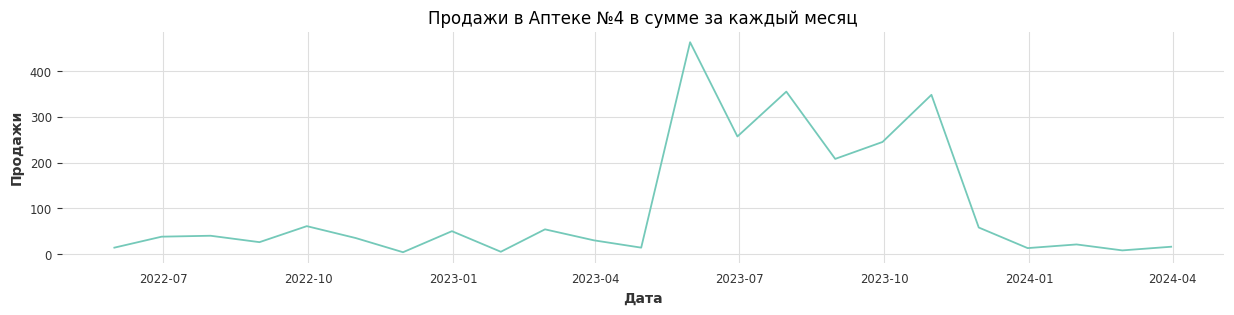

ADF Statistic: -2.519521
p-value: 0.110797
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


In [284]:
plt.figure(figsize=(15,3))
plt.plot(dtr_2_1['date_of_sale'], dtr_2_1['quantity_sale'], color= col_3)
plt.title('Продажи в Аптеке №4 по дням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dtr_2_1['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15,3))
plt.plot(df2_r.index, df2_r['quantity_sale'], color= col_2)
plt.title('Продажи в Аптеке №4 в сумме за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(df2_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [285]:
data_train_01 = data_train[data_train['product_code'] == kod_1]
data_train_01.date_of_sale = pd.to_datetime(data_train_01.date_of_sale)
dfs = pd.DataFrame(data_train_01)
dfs.drop(['type_of_product', 'pharmacy_id'], axis=1, inplace=True )
dfs['date_of_sale'] = pd.to_datetime(dfs['date_of_sale'])
dfs.set_index('date_of_sale', inplace = True)
dfs_r = df0.resample('M').sum()
dfs_r.head()

,quantity_sale
date_of_sale,
2022-04-30,24.0
2022-05-31,30.0
2022-06-30,61.0
2022-07-31,55.0
2022-08-31,72.0


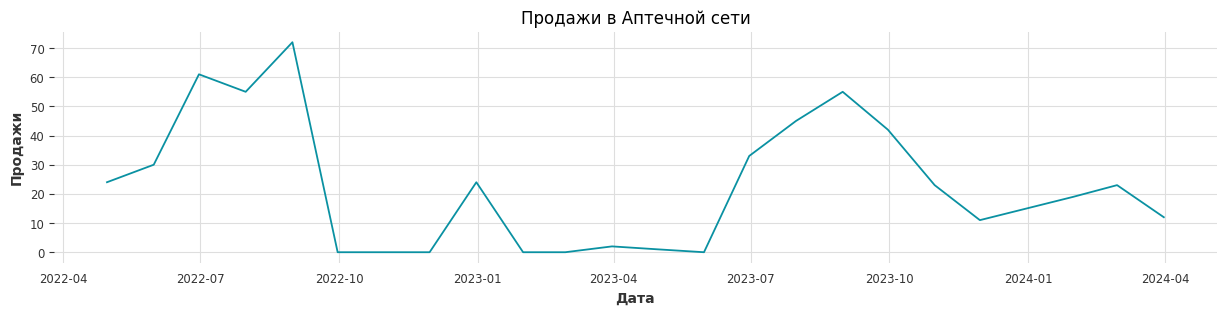

ADF Statistic: -3.605556
p-value: 0.005656
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


In [286]:
plt.figure(figsize=(15,3))
plt.plot(dfs_r.index, dfs_r['quantity_sale'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

result = adfuller(dfs_r['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Вывод : т.к. р - значения в тесте по сводным данным по всем подразделениям меньше уровня значимости (в основном это 0.05), то позволительно отклонить нулевую гипотезу о нестационарности данных и считать их стационарными.

В тестах по каждой аптеке по ряду с данными по месяцам ряды не стационарны по всем подразделениям, кроме Аптек №1 и №4.

Ввиду вышесказанного и того условия, что код товара будет менятся, и всегда есть шанс получить датасет с нестационарными рядами, следует преобразовать ряд для достижения стационарности методом дифференцирования.

**Компоненты временных рядов**



*   Тренд (Trend): показывает общее направление движения данных временного ряда на
протяжении длительного времени. Это может быть восходящий тренд (увеличение значений), нисходящий тренд (уменьшение значений) или отсутствие тренда (значения остаются примерно на одном уровне).
*   Сезонность (Seasonality): повторяющиеся колебания данных временного ряда, которые происходят с регулярными интервалами времени, например, ежемесячно, ежеквартально или ежегодно.
*   Цикличность (Cyclical):  колебания временного ряда, которые происходят на более длительных временных интервалах и не обязательно регулярны. Циклы могут быть связаны с экономическими, политическими или другими внешними факторами.
*   Нерегулярность/остатки (Irregularity/residuals): представляют собой случайные и непредсказуемые изменения в данных временного ряда, которые не связаны с трендом, сезонностью или цикличностью.

In [287]:
# Делаем дату индексом
data_train_01.set_index('date_of_sale', inplace=True)

In [288]:
# Снижаем частотность ряда

In [289]:
dfnet = pd.DataFrame(data_train_01)
dfnet.drop(['type_of_product', 'product_code','pharmacy_id'], axis=1, inplace=True )


dfnet_r = dfnet.resample('M').sum()

In [290]:
# Декомпозиция временного ряда
decomposition = sm.tsa.seasonal_decompose(data_train_01['quantity_sale'], model='additive', period=365)

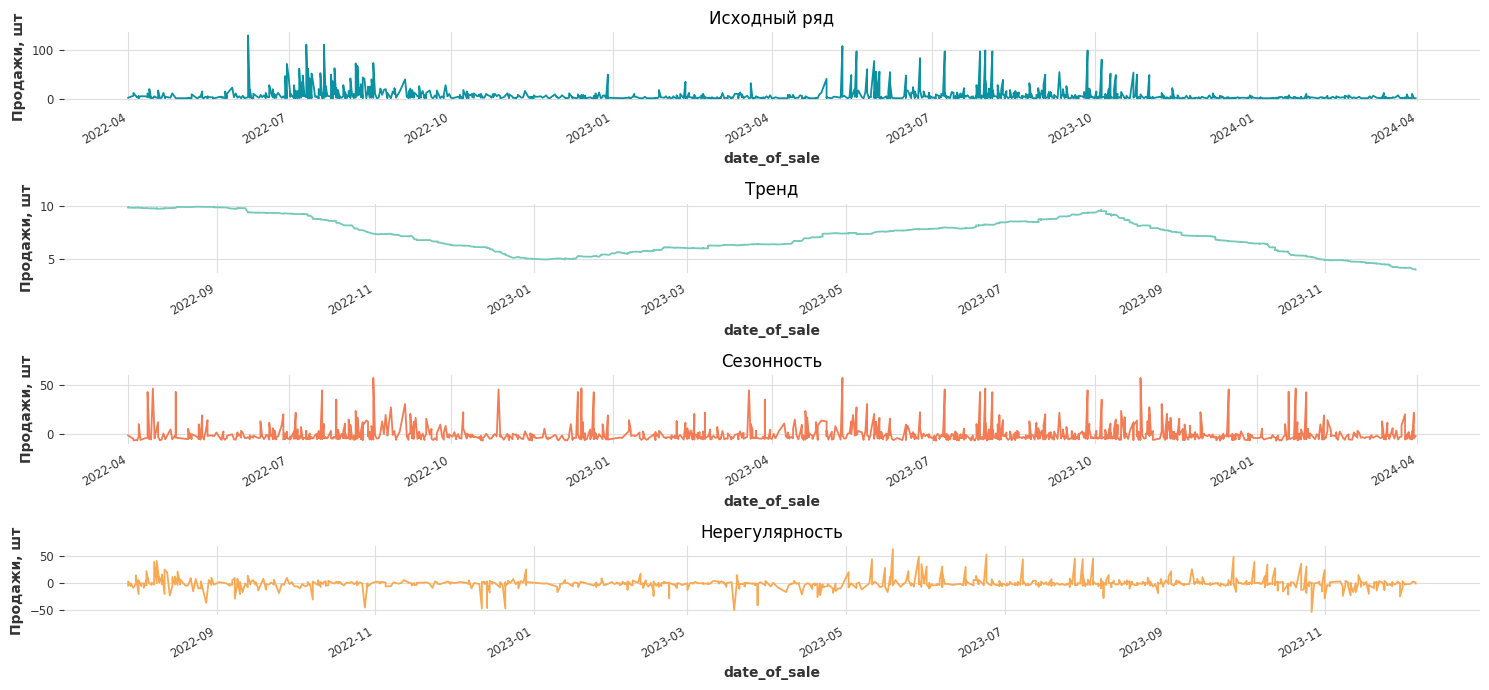

In [291]:
# Визуализация компонентов временного ряда
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 7))
# Исходный ряд
decomposition.observed.plot(ax=ax1, color = col_1)
ax1.set_ylabel('Продажи, шт')
ax1.set_title('Исходный ряд')
# Тренд
decomposition.trend.plot(ax=ax2, color = col_2)
ax2.set_ylabel('Продажи, шт')
ax2.set_title('Тренд')

# Сезонность
decomposition.seasonal.plot(ax=ax3, color = col_3)
ax3.set_ylabel('Продажи, шт')
ax3.set_title('Сезонность')

# Остатки
decomposition.resid.plot(ax=ax4, color = col_4)
ax4.set_ylabel('Продажи, шт')
ax4.set_title('Нерегулярность')

plt.tight_layout()
plt.show()

*Компоненты в ряду с меньшей частотностью*

In [292]:
# Декомпозиция временного ряда
decomposition = sm.tsa.seasonal_decompose(dfnet_r['quantity_sale'], model='additive', period=12)

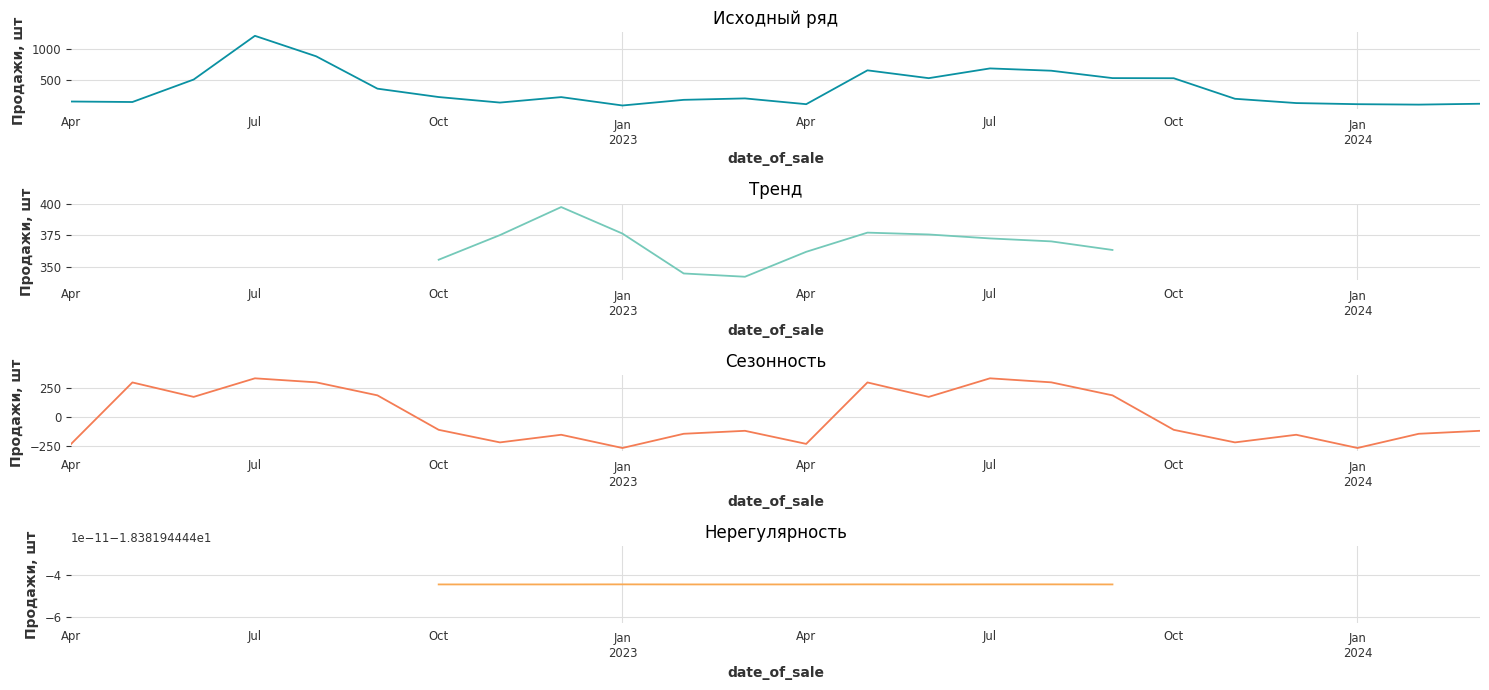

In [293]:
# Визуализация компонентов временного ряда
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 7))
# Исходный ряд
decomposition.observed.plot(ax=ax1, color = col_1)
ax1.set_ylabel('Продажи, шт')
ax1.set_title('Исходный ряд')
# Тренд
decomposition.trend.plot(ax=ax2, color = col_2)
ax2.set_ylabel('Продажи, шт')
ax2.set_title('Тренд')

# Сезонность
decomposition.seasonal.plot(ax=ax3, color = col_3)
ax3.set_ylabel('Продажи, шт')
ax3.set_title('Сезонность')

# Остатки
decomposition.resid.plot(ax=ax4, color = col_4)
ax4.set_ylabel('Продажи, шт')
ax4.set_title('Нерегулярность')

plt.tight_layout()
plt.show()

Вывод: На графике видна явная сезонность, с приростом в летние месяцы.

**Преведение ряда к стационарности**


ADF Statistic: -4.858849
p-value: 0.000042
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


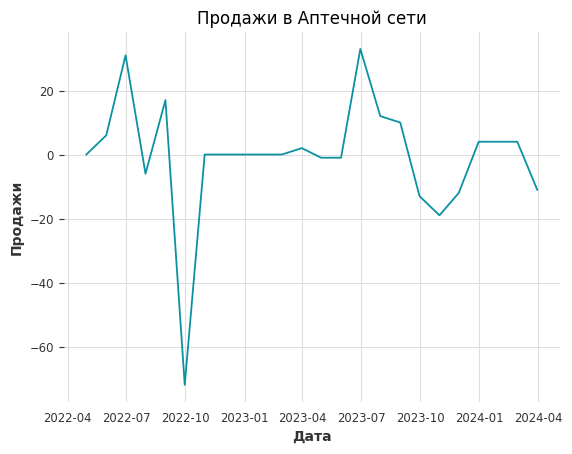

In [294]:
df0_rs = df0_r.diff()
df0_rs = df0_rs.fillna(0)
result = adfuller(df0_rs['quantity_sale_new'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.plot(df0_rs.index, df0_rs['quantity_sale_new'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

ADF Statistic: -5.292282
p-value: 0.000006
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674


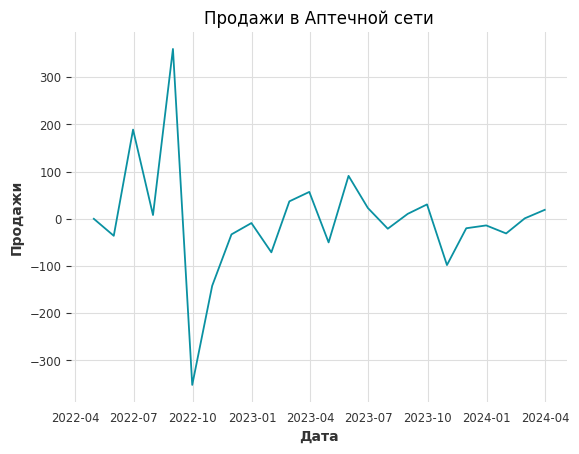

In [295]:
df1_rs = df1_r.diff()
df1_rs = df1_rs.fillna(0)
result = adfuller(df1_rs['quantity_sale_new'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.plot(df1_rs.index, df1_rs['quantity_sale_new'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

ADF Statistic: -6.976834
p-value: 0.000000
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


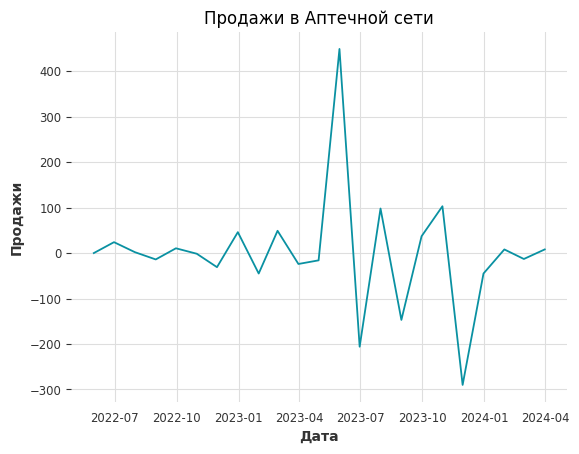

In [296]:
df2_rs = df2_r.diff()
df2_rs = df2_rs.fillna(0)
result = adfuller(df2_rs['quantity_sale_new'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.plot(df2_rs.index, df2_rs['quantity_sale_new'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

ADF Statistic: -3.061544
p-value: 0.029533
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


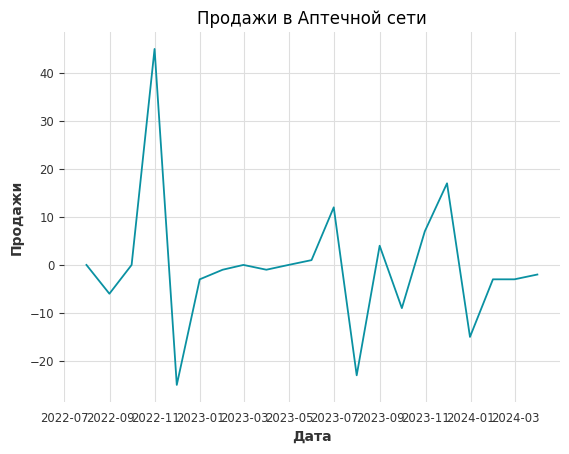

In [297]:
df3_rs = df3_r.diff()
df3_rs = df3_rs.fillna(0)
result = adfuller(df3_rs['quantity_sale'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.plot(df3_rs.index, df3_rs['quantity_sale'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

ADF Statistic: -1.295667
p-value: 0.631152
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691


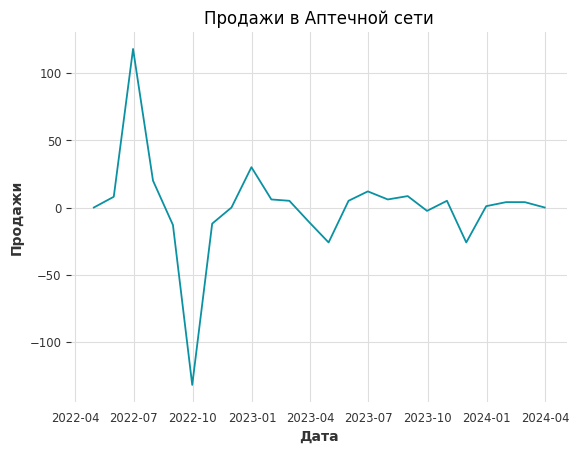

In [298]:
df4_rs = df4_r.diff()
df4_rs = df4_rs.fillna(0)
result = adfuller(df4_rs['quantity_sale_new'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

plt.plot(df4_rs.index, df4_rs['quantity_sale_new'], color = col_1)
plt.title('Продажи в Аптечной сети')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

Выбор и обучение модели


**Модель SARIMAX**

По каждому подразделению по отдельности


In [299]:
model_0 = SARIMAX(df0_r['quantity_sale'], order=(1, 1, 1))
model_fit_0 = model_0.fit()
print(model_fit_0.summary())

forecast_0 = model_fit_0.forecast(steps=12)
mse = mean_squared_error(df0_r['quantity_sale'][-12:], forecast_0)
mae = mean_absolute_error(df0_r['quantity_sale'][-12:], forecast_0)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

                               SARIMAX Results                                
Dep. Variable:          quantity_sale   No. Observations:                   24
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -100.896
Date:                Fri, 30 Aug 2024   AIC                            207.792
Time:                        20:06:38   BIC                            211.198
Sample:                    04-30-2022   HQIC                           208.649
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9781      0.109     -8.994      0.000      -1.191      -0.765
ma.L1          0.8938      0.332      2.691      0.007       0.243       1.545
sigma2       368.6579    110.367      3.340      0.0

In [300]:
model_1 = SARIMAX(df1_r['quantity_sale'], order=(1, 1, 1))
model_fit_1 = model_1.fit()
print(model_fit_1.summary())

forecast_1 = model_fit_1.forecast(steps=12)
mse = mean_squared_error(df1_r['quantity_sale'][-12:], forecast_1)
mae = mean_absolute_error(df1_r['quantity_sale'][-12:], forecast_1)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

                               SARIMAX Results                                
Dep. Variable:          quantity_sale   No. Observations:                   24
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -152.063
Date:                Fri, 30 Aug 2024   AIC                            310.125
Time:                        20:06:42   BIC                            313.532
Sample:                    04-30-2022   HQIC                           310.982
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7345      0.292     -2.517      0.012      -1.307      -0.162
ma.L1          0.9954      6.639      0.150      0.881     -12.017      14.008
sigma2      3.047e+04   1.96e+05      0.156      0.8

In [301]:
model_2 = SARIMAX(df2_r['quantity_sale'], order=(1, 1, 1))
model_fit_2 = model_2.fit()
print(model_fit_2.summary())

forecast_2 = model_fit_2.forecast(steps=12)
mse = mean_squared_error(dtr_2_1['quantity_sale'][-12:], forecast_2)
mae = mean_absolute_error(dtr_2_1['quantity_sale'][-12:], forecast_2)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

                               SARIMAX Results                                
Dep. Variable:          quantity_sale   No. Observations:                   23
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -136.599
Date:                Fri, 30 Aug 2024   AIC                            279.199
Time:                        20:06:43   BIC                            282.472
Sample:                    05-31-2022   HQIC                           279.970
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2597      1.228     -0.212      0.832      -2.666       2.147
ma.L1         -0.1713      1.416     -0.121      0.904      -2.946       2.604
sigma2      1.436e+04   2358.150      6.088      0.0

In [302]:
model_3 = SARIMAX(df3_r['quantity_sale_new'], order=(1, 1, 1))
model_fit_3 = model_3.fit()
print(model_fit_3.summary())

forecast_3 = model_fit_3.forecast(steps=12)
mse = mean_squared_error(df3_r['quantity_sale_new'][-12:], forecast_3)
mae = mean_absolute_error(df3_r['quantity_sale_new'][-12:], forecast_3)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

                               SARIMAX Results                                
Dep. Variable:      quantity_sale_new   No. Observations:                   21
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -60.878
Date:                Fri, 30 Aug 2024   AIC                            127.756
Time:                        20:06:43   BIC                            130.743
Sample:                    07-31-2022   HQIC                           128.339
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7826      1.619     -0.483      0.629      -3.957       2.391
ma.L1          0.7095      1.700      0.417      0.676      -2.622       4.041
sigma2        25.7524      7.741      3.327      0.0

In [303]:
model_4 = SARIMAX(df4_r['quantity_sale_new'], order=(1, 1, 1))
model_fit_4 = model_4.fit()
print(model_fit_4.summary())

forecast_4 = model_fit_4.forecast(steps=12)
mse = mean_squared_error(df4_r['quantity_sale_new'][-12:], forecast_4)
mae = mean_absolute_error(df4_r['quantity_sale_new'][-12:], forecast_4)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

                               SARIMAX Results                                
Dep. Variable:      quantity_sale_new   No. Observations:                   24
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -116.413
Date:                Fri, 30 Aug 2024   AIC                            238.826
Time:                        20:06:43   BIC                            242.232
Sample:                    04-30-2022   HQIC                           239.683
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0690      3.758      0.018      0.985      -7.296       7.434
ma.L1          0.1280      3.788      0.034      0.973      -7.295       7.551
sigma2      1455.8005    318.609      4.569      0.0

Пробуем прогнозировать для каждго подразделения по отдельности SARIMAX

In [304]:
forecast_future_0 = model_fit_0.forecast(steps=4)
future_dates_0 = pd.date_range(start='2024-04-01', periods=4, freq='M')
forecast_df_0 = pd.DataFrame({'Date': future_dates_0, 'Forecast sales': forecast_future_0})

forecast_df_0.head()

,Date,Forecast sales
2024-04-30,2024-04-30,16.962351
2024-05-31,2024-05-31,12.108672
2024-06-30,2024-06-30,16.856059
2024-07-31,2024-07-31,12.212636


In [305]:
forecast_future_1 = model_fit_1.forecast(steps=4)
future_dates_1 = pd.date_range(start='2024-04-01', periods=4, freq='M')
forecast_df_1 = pd.DataFrame({'Date': future_dates_1, 'Forecast sales': forecast_future_1})

forecast_df_1.head()

,Date,Forecast sales
2024-04-30,2024-04-30,88.711864
2024-05-31,2024-05-31,71.295002
2024-06-30,2024-06-30,84.088053
2024-07-31,2024-07-31,74.691289


In [306]:
forecast_future_2 = model_fit_2.forecast(steps=4)
future_dates_2 = pd.date_range(start='2024-04-01', periods=4, freq='M')
forecast_df_2 = pd.DataFrame({'Date': future_dates_2, 'Forecast sales': forecast_future_2})

forecast_df_2.head()

,Date,Forecast sales
2024-04-30,2024-04-30,13.609037
2024-05-31,2024-05-31,14.230010
2024-06-30,2024-06-30,14.068733
2024-07-31,2024-07-31,14.110619


In [307]:
forecast_future_3 = model_fit_3.forecast(steps=4)
future_dates_3 = pd.date_range(start='2024-04-01', periods=4, freq='M')
forecast_df_3 = pd.DataFrame({'Date': future_dates_3, 'Forecast sales': forecast_future_3})

forecast_df_3.head()

,Date,Forecast sales
2024-04-30,2024-04-30,1.351722
2024-05-31,2024-05-31,1.076481
2024-06-30,2024-06-30,1.291872
2024-07-31,2024-07-31,1.123317


In [308]:
forecast_future_4 = model_fit_4.forecast(steps=4)
future_dates_4 = pd.date_range(start='2024-04-01', periods=4, freq='M')
forecast_df_4 = pd.DataFrame({'Date': future_dates_4, 'Forecast sales': forecast_future_4})

forecast_df_4.head()

,Date,Forecast sales
2024-04-30,2024-04-30,20.910241
2024-05-31,2024-05-31,20.904049
2024-06-30,2024-06-30,20.903622
2024-07-31,2024-07-31,20.903592


Авторегрессивная модель (Auto-Regressive Model, AR)

In [309]:
model_ar0 = AutoReg(df0_r.quantity_sale_new, lags=0).fit() # Определение и обучение модели AR с лагом 12
forecast_ar0 = model_ar0.predict(start=0, end=len(df0_r.quantity_sale) + 3, dynamic=False) # Прогнозирование на 3 шага вперед

forecast_index_ar0 = pd.date_range(start=df0_r.index[21], periods=len(forecast_ar0))# Создание индекса для прогнозного периода
#расчетный результат




forecast_ar0[-4:].mean()
print(model_ar0.summary())

result_ar0 = forecast_ar0[-4:].sum()
result_ar0

                            AutoReg Model Results                             
Dep. Variable:      quantity_sale_new   No. Observations:                   24
Model:                     AutoReg(0)   Log Likelihood                -108.455
Method:               Conditional MLE   S.D. of innovations             22.198
Date:                Fri, 30 Aug 2024   AIC                            220.909
Time:                        20:06:44   BIC                            223.265
Sample:                    04-30-2022   HQIC                           221.534
                         - 03-31-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7917      4.531      4.809      0.000      12.911      30.673


87.16666666666669

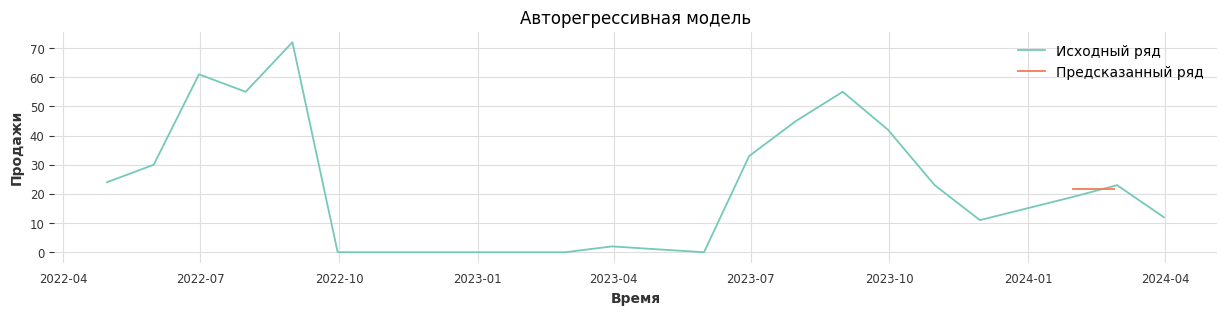

In [310]:
# Построение графика прогноза
plt.figure(figsize=(15, 3))
plt.plot(df0_r.quantity_sale_new, label='Исходный ряд',color = col_2)
plt.plot(forecast_index_ar0, forecast_ar0, label='Предсказанный ряд', color=col_3)
plt.title('Авторегрессивная модель')
plt.xlabel('Время')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [311]:
model_ar1 = AutoReg(df1_r.quantity_sale_new, lags=0).fit() # Определение и обучение модели AR с лагом 12
forecast_ar1 = model_ar1.predict(start=0, end=len(df1_r.quantity_sale) + 3, dynamic=False) # Прогнозирование на 3 шага вперед
# Создание индекса для прогнозного периода
forecast_index_ar1 = pd.date_range(start=df1_r.index[21], periods=len(forecast_ar1))# Создание индекса для прогнозного периода
print(model_ar1.summary())
forecast_ar1.mean()
result_ar1 = forecast_ar1[-4:].sum()
print(result_ar1.round(1))

                            AutoReg Model Results                             
Dep. Variable:      quantity_sale_new   No. Observations:                   24
Model:                     AutoReg(0)   Log Likelihood                -149.748
Method:               Conditional MLE   S.D. of innovations            124.037
Date:                Fri, 30 Aug 2024   AIC                            303.497
Time:                        20:06:44   BIC                            305.853
Sample:                    04-30-2022   HQIC                           304.122
                         - 03-31-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1042     25.319      6.008      0.000     102.480     201.728
608.4


In [312]:
model_ar2 = AutoReg(df2_r.quantity_sale_new, lags=0).fit() # Определение и обучение модели AR с лагом 12
forecast_ar2 = model_ar2.predict(start=0, end=len(df2_r.quantity_sale) + 3, dynamic=False) # Прогнозирование на 3 шага вперед
# Создание индекса для прогнозного периода
forecast_index_ar2 = pd.date_range(start=df2_r.index[21], periods=len(forecast_ar2))# Создание индекса для прогнозного периода
forecast_ar2.mean()
print(model_ar2.summary())
result_ar2 = forecast_ar2[-4:].sum()
print(result_ar2.round(1))

                            AutoReg Model Results                             
Dep. Variable:      quantity_sale_new   No. Observations:                   23
Model:                     AutoReg(0)   Log Likelihood                -145.213
Method:               Conditional MLE   S.D. of innovations            133.578
Date:                Fri, 30 Aug 2024   AIC                            294.427
Time:                        20:06:44   BIC                            296.698
Sample:                    05-31-2022   HQIC                           294.998
                         - 03-31-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.6739     27.853      3.650      0.000      47.083     156.265
406.7


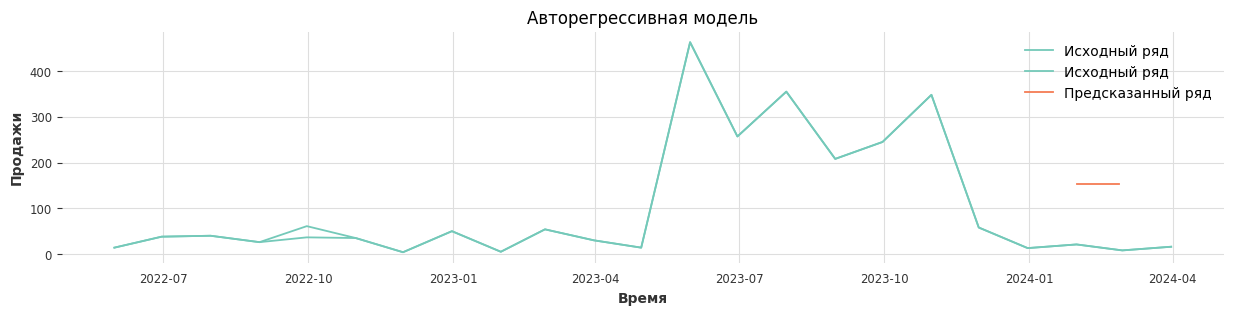

In [313]:
plt.figure(figsize=(15, 3))
plt.plot(df2_r, label='Исходный ряд', color=col_2)
plt.plot(forecast_index_ar1, forecast_ar1, label='Предсказанный ряд', color=col_3)
plt.title('Авторегрессивная модель')
plt.xlabel('Время')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [314]:
model_ar3 = AutoReg(df3_r.quantity_sale_new, lags=0).fit() # Определение и обучение модели AR с лагом 12
forecast_ar3 = model_ar3.predict(start=0, end=len(df3_r.quantity_sale) + 3, dynamic=False) # Прогнозирование на 3 шага вперед
# Создание индекса для прогнозного периода
forecast_index_ar3 = pd.date_range(start=df3_r.index[19], periods=len(forecast_ar3))# Создание индекса для прогнозного периода
forecast_ar3.mean()
result_ar3 = forecast_ar3[-4:].sum()
print(result_ar3.round(1))

37.2


In [315]:
model_ar4 = AutoReg(df4_r.quantity_sale_new, lags=0).fit() # Определение и обучение модели AR с лагом 12
forecast_ar4 = model_ar4.predict(start=0, end=len(df4_r.quantity_sale) + 3, dynamic=False) # Прогнозирование на 3 шага вперед
# Создание индекса для прогнозного периода
forecast_index_ar4 = pd.date_range(start=df3_r.index[19], periods=len(forecast_ar4))# Создание индекса для прогнозного периода
forecast_ar4.mean()
result_ar4 = forecast_ar4[-4:].sum()
print(result_ar4.round(1))

144.8


**Модель скользящего среднего (Moving Average)**

Простое скользящее среднее (SMA)

SMA сглаживает данные, показывая общую тенденцию и устраняя случайные колебания.

In [316]:
# Параметры для скользящего среднего
window_size_short0 = 2  # короткий период
window_size_long0 = 5   # длинный период

# Расчет скользящего среднего
sma_short0 = df0_r.rolling(window=window_size_short0).mean()
sma_long0 = df0_r.rolling(window=window_size_long0).mean()

result_sma0 = sma_long0[-4:].sum()

In [317]:
result_sma0

,0
quantity_sale,85.4
quantity_sale_new,85.4


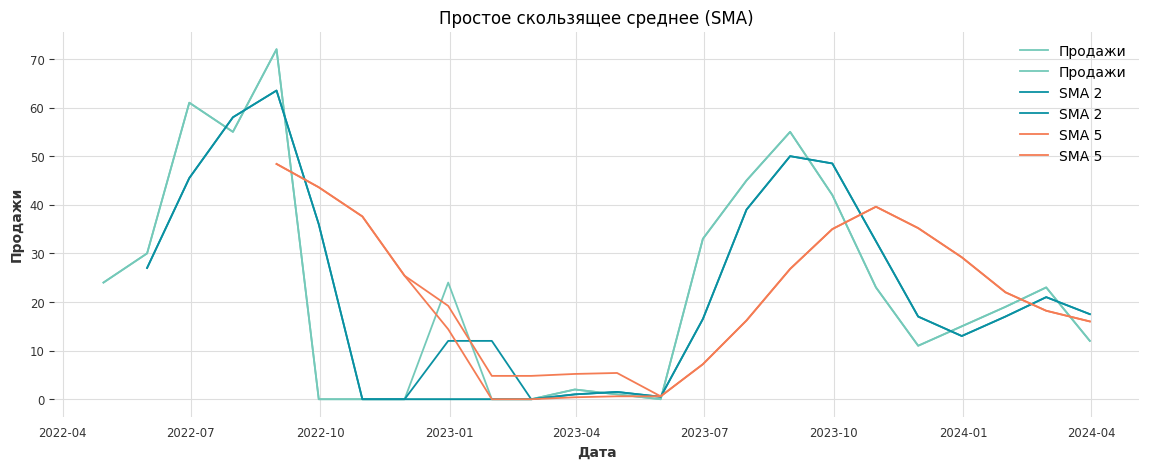

In [318]:
# Визуализация
plt.figure(figsize=(14, 5))
plt.plot(df0_r, label='Продажи', color = col_2)
plt.plot(sma_short0, label=f'SMA {window_size_short0}', color=col_1)
plt.plot(sma_long0, label=f'SMA {window_size_long0}', color=col_3)
plt.title('Простое скользящее среднее (SMA)')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

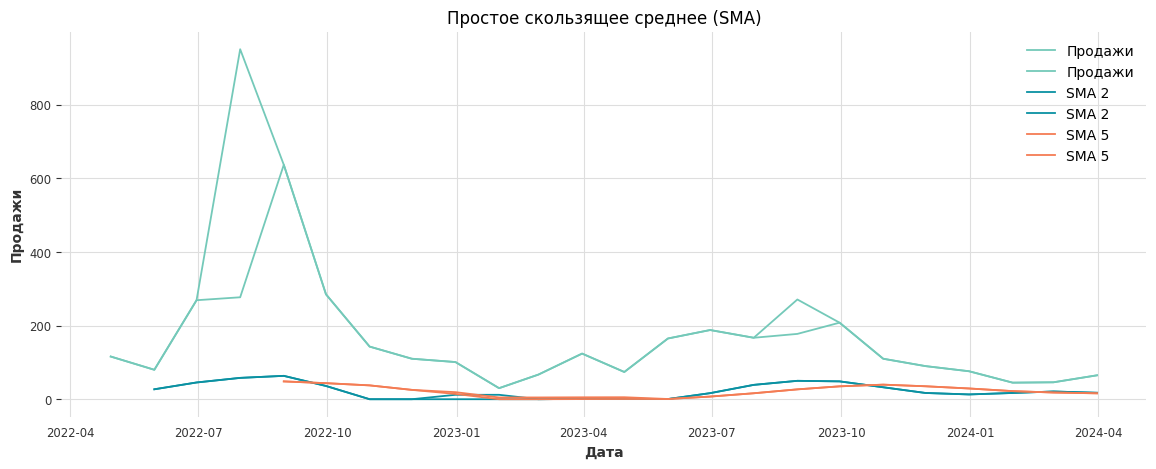

In [319]:
window_size_short1 = 2  # короткий период
window_size_long1 = 5   # длинный период

# Расчет скользящего среднего
sma_short1 = df1_r.rolling(window=window_size_short1).mean()
sma_long1 = df1_r.rolling(window=window_size_long1).mean()



result_sma1 = sma_long1[-4:].sum()


plt.figure(figsize=(14, 5))
plt.plot(df1_r, label='Продажи', color = col_2)
plt.plot(sma_short0, label=f'SMA {window_size_short0}', color=col_1)
plt.plot(sma_long0, label=f'SMA {window_size_long0}', color=col_3)
plt.title('Простое скользящее среднее (SMA)')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [320]:
window_size_short2 = 3 # короткий период
window_size_long2 = 5   # длинный период

# Расчет скользящего среднего
sma_short2 = df2_r.rolling(window=window_size_short2).mean()
sma_long2 = df2_r.rolling(window=window_size_long2).mean()


result_sma2 = sma_short2[-4:].sum()

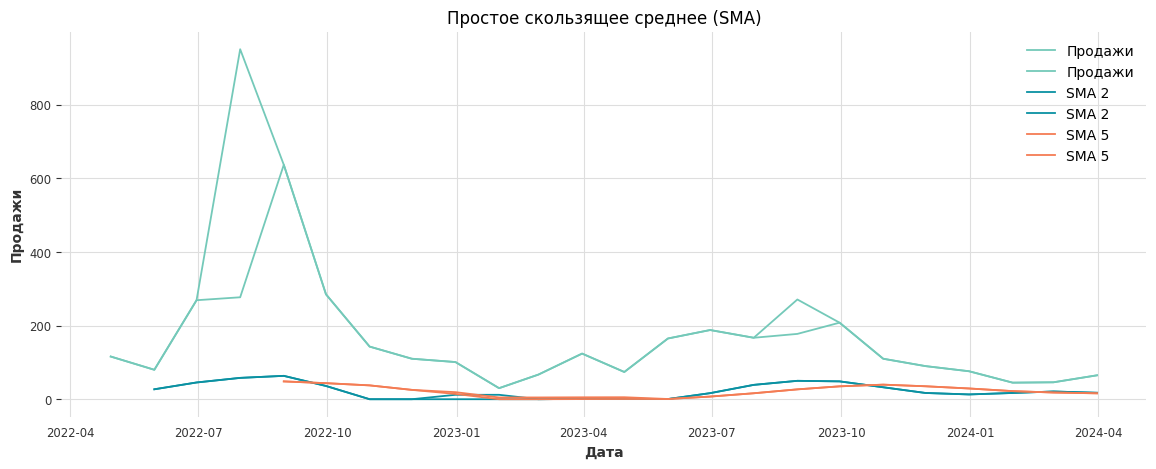

In [321]:
window_size_short3 = 3  # короткий период
window_size_long3 = 6   # длинный период

# Расчет скользящего среднего
sma_short3 = df3_r.rolling(window=window_size_short3).mean()
sma_long3 = df3_r.rolling(window=window_size_long3).mean()


result_sma3 = sma_short3[-4:].sum()


plt.figure(figsize=(14, 5))
plt.plot(df1_r, label='Продажи', color = col_2)
plt.plot(sma_short0, label=f'SMA {window_size_short0}', color=col_1)
plt.plot(sma_long0, label=f'SMA {window_size_long0}', color=col_3)
plt.title('Простое скользящее среднее (SMA)')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [322]:
sma_short3[:4].sum()

,0
quantity_sale,17.000000
quantity_sale_new,5.833333


In [323]:
window_size_short4 = 3  # короткий период
window_size_long4 = 6   # длинный период

# Расчет скользящего среднего
sma_short4 = df4_r.rolling(window=window_size_short4).mean()
sma_long4 = df4_r.rolling(window=window_size_long4).mean()

result_sma4 = sma_long4[-4:].sum()

**Модель ARIMA**

Для определения параметров этих моделей нужно анализировать ACF и PACF.
Функция автокорреляции (Auto-Correlation Function, ACF);
Частичная функция автокорреляции (Partial Auto-Correlation, PACF).

*   ACF измеряет степень сходства между значением временного ряда и его прошлыми значениями с разными временными лагами. Другими словами, ACF измеряет корреляцию между временными отклонениями ряда и его отставаниями на различные лаги.
*  PACF показывает прямую корреляцию между текущим значением и его прошлыми значениями с учетом временных лагов. При этом она исключает влияние промежуточных значений на эту корреляцию

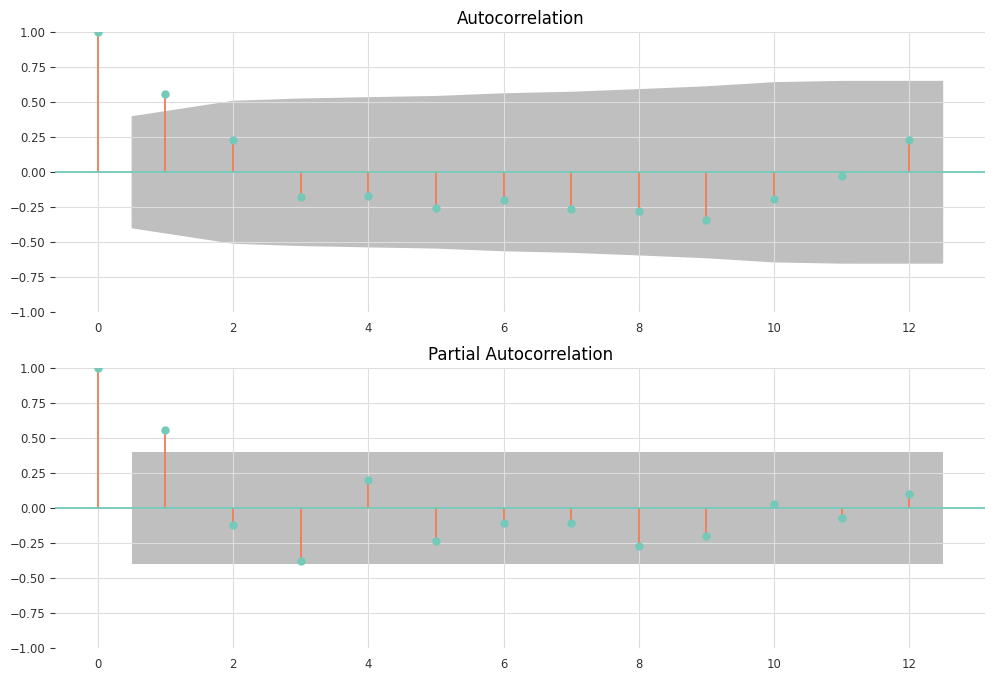

In [324]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), edgecolor=col_3)

sm.graphics.tsa.plot_acf(df0_r.quantity_sale, ax=ax1, lags=12, color=col_2, vlines_kwargs={'colors': col_3})
sm.graphics.tsa.plot_pacf(df0_r.quantity_sale, ax=ax2, lags=12, color = col_2, vlines_kwargs={'colors': col_3})
plt.show()

In [325]:
# Оценка модели ARMA
p = 1  # Порядок авторегрессии (AR)
d = 0  # Порядок разностей (d)
q = 1  # Порядок скользящего среднего (MA)

In [326]:
model_arima0 = sm.tsa.ARIMA(df0_r.quantity_sale, order=(p, d, q)).fit()
forecast_horizon = 3
forecast_arma0 = model_arima0.predict(start=0, end=len(df0_r.quantity_sale) + forecast_horizon)
# Создание индекса для прогнозного периода
forecast_index_arima0 = pd.date_range(start=df0_r.quantity_sale.index[22], periods=len(forecast_arma0))


result_arima0 = forecast_arma0[-4:].sum()

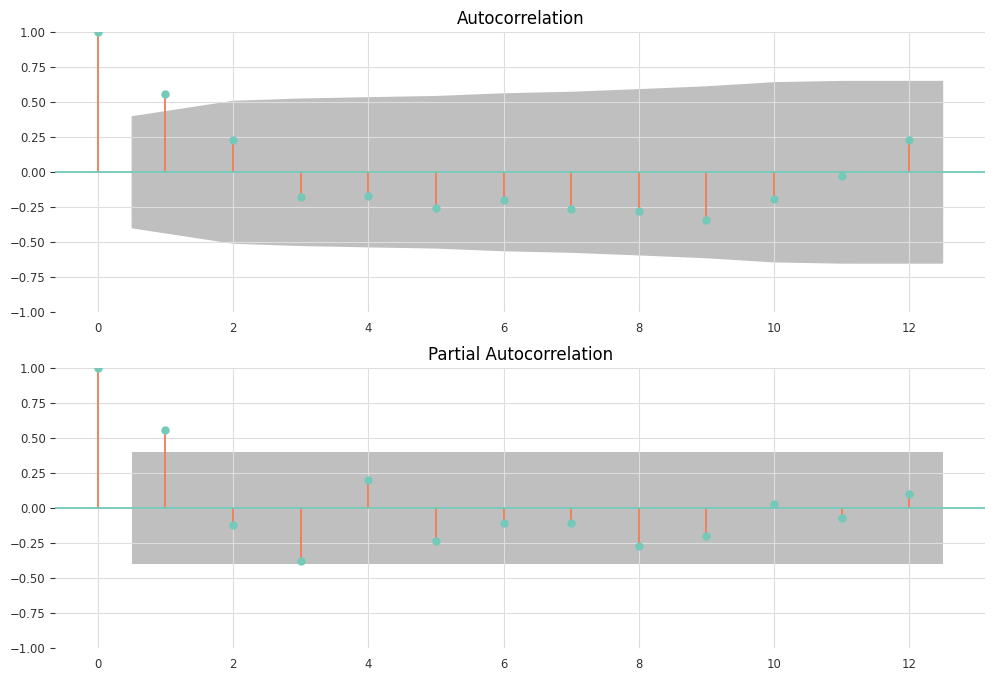

In [327]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), edgecolor=col_3)

sm.graphics.tsa.plot_acf(df0_r.quantity_sale, ax=ax1, lags=12, color=col_2, vlines_kwargs={'colors': col_3})
sm.graphics.tsa.plot_pacf(df0_r.quantity_sale, ax=ax2, lags=12, color = col_2, vlines_kwargs={'colors': col_3})
plt.show()

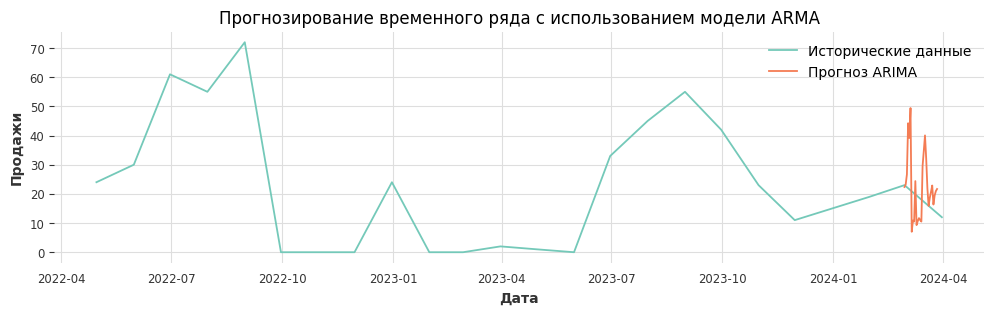

In [328]:
# Визуализация исторических данных и прогноза
plt.figure(figsize=(12, 3))
plt.plot(df0_r.quantity_sale.index, df0_r.quantity_sale, label='Исторические данные', color = col_2)
plt.plot(forecast_index_arima0, forecast_arma0, label='Прогноз ARIMA', color=col_3)
plt.title('Прогнозирование временного ряда с использованием модели ARMA')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [329]:
model_arima1 = sm.tsa.ARIMA(df1_r.quantity_sale, order=(p, d, q)).fit()
forecast_horizon = 3
forecast_arma1 = model_arima1.predict(start=0, end=len(df1_r.quantity_sale) + forecast_horizon)
# Создание индекса для прогнозного периода
forecast_index_arima1 = pd.date_range(start=df1_r.quantity_sale.index[22], periods=len(forecast_arma0))


result_arima1 = forecast_arma1[-4:].sum()

In [330]:
model_arima2 = sm.tsa.ARIMA(df2_r.quantity_sale, order=(p, d, q)).fit()
forecast_horizon = 3
forecast_arma2 = model_arima2.predict(start=0, end=len(df1_r.quantity_sale) + forecast_horizon)
# Создание индекса для прогнозного периода
forecast_index_arima2 = pd.date_range(start=df2_r.quantity_sale.index[22], periods=len(forecast_arma0))


result_arima2 = forecast_arma2[-4:].sum()

In [331]:
model_arima3 = sm.tsa.ARIMA(df3_r.quantity_sale, order=(p, d, q)).fit()
forecast_horizon = 3
forecast_arma3 = model_arima3.predict(start=0, end=len(df1_r.quantity_sale) + forecast_horizon)
# Создание индекса для прогнозного периода
forecast_index_arima3 = pd.date_range(start=df3_r.quantity_sale.index[20], periods=len(forecast_arma0))


result_arima3 = forecast_arma3[-4:].sum()

In [332]:
model_arima4 = sm.tsa.ARIMA(df4_r.quantity_sale, order=(p, d, q)).fit()
forecast_horizon = 3
forecast_arma4 = model_arima4.predict(start=0, end=len(df1_r.quantity_sale) + forecast_horizon)
# Создание индекса для прогнозного периода
forecast_index_arima4 = pd.date_range(start=df4_r.quantity_sale.index[22], periods=len(forecast_arma0))


result_arima4 = forecast_arma4[-4:].sum()

Выбор модели

По  подразделениям: 2, 3, 4 - Лучше себя проявила модель ARIMA, по подразделениям 0  модель AR, по подразделению 1 - SARIMAX

XGBoost




Обзор и проба метода. Не применяется в качестве модели в данной работе


Функция для создания переменных



In [333]:
def NetData1(df1, lag_start=5, lag_end=10, test_size=0.15):

    df1 = pd.DataFrame(df1.copy())
    df1.columns = ["quantity_sale"]


    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(df1)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        df1["lag_{}".format(i)] = df1.quantity_sale.shift(i)

    df1 = df1.dropna()
    df1 = df1.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = df1.loc[:test_index].drop(["quantity_sale"], axis=1)
    y_train = df1.loc[:test_index]["quantity_sale"]
    X_test = df1.loc[test_index:].drop(["quantity_sale"], axis=1)
    y_test = df1.loc[test_index:]["quantity_sale"]

    return X_train, X_test, y_train, y_test

In [334]:
def XGB_forecast1(df1, lag_start=2, lag_end=10, test_size=0.15, scale = 1.1):

    # исходные данные
    X_train, X_test, y_train, y_test = NetData1(df1.quantity_sale, lag_start, lag_end, test_size)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1000

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())



    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train1 = bst.predict(dtrain)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train1, color = col_2)
    plt.plot(y_train, color = col_3)
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test1 = bst.predict(dtest)
    lower = prediction_test1-scale*deviation
    upper = prediction_test1+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]



    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test1, label="prediction", color = col_1)
    plt.plot(lower, "r--", label="upper bond / lower bond", color = col_3)
    plt.plot(upper, "r--", color = col_2)
    plt.plot(list(y_test), label="y_test", color = col_4)
    plt.plot(Anomalies, "ro", markersize=10, color = col_1)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test1, y_test))))
    plt.grid(True)
    plt.legend()

    result_XGB1 = prediction_train1[-50:].sum()
    print('MAE_XGB', '=', mean_absolute_error(prediction_test1, y_test))
    print(result_XGB1.round(1))


MAE_XGB = 2.891740507893748
424.7


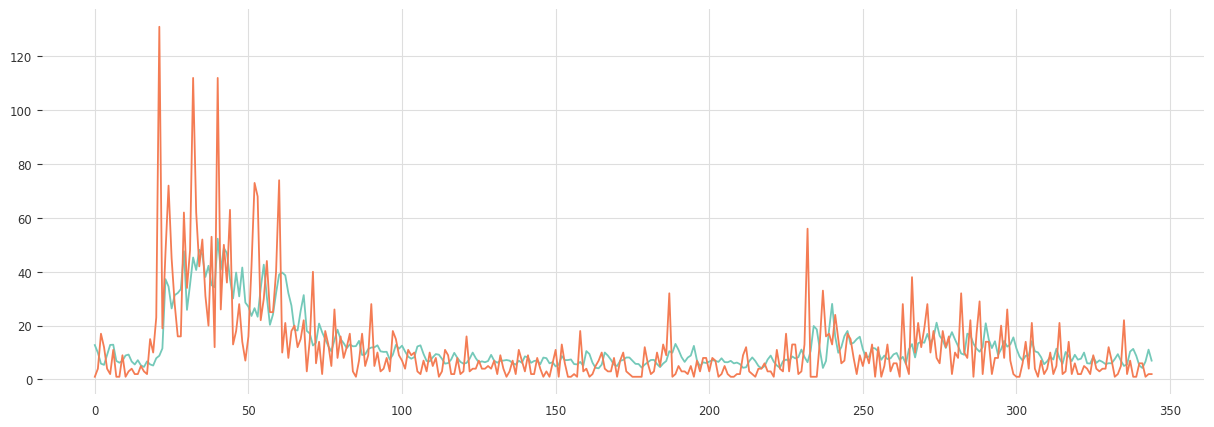

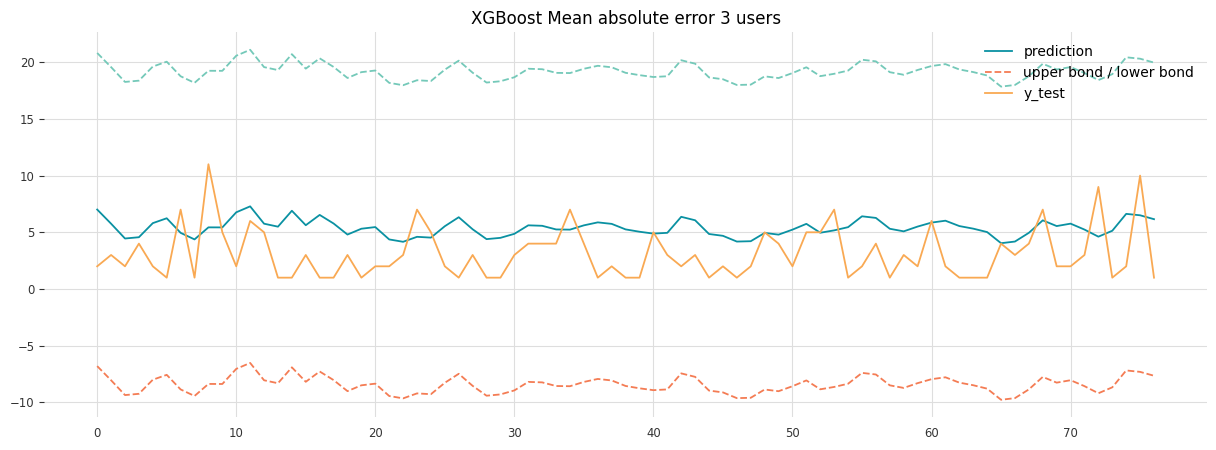

In [335]:
XGB_forecast1(df1, test_size=0.2, lag_start=2, lag_end=10)



Выводим результаты прогнозов и реальные продажи за период

In [336]:
forecast_Real_0 = dtst_0_1.quantity_sale.sum()
forecast_df_0['Forecast sales']=forecast_df_0['Forecast sales'].astype (float)
f_srm0 =  forecast_df_0['Forecast sales'][-4:].sum().round(1)
print("Прогнозный временной ряд SARIMAX",
      forecast_df_0['Forecast sales'][-4:].sum().round(1))
print("Прогнозный временной ряд AR"," ", result_ar0.round(1))
print("Тренировочный временной ряд SMA"," ", result_sma0.quantity_sale.round(1))
print("Прогнозный временной ряд ARIMA"," ",result_arima0.round(1))
print("Реальные продажи"," ", forecast_Real_0.round(1))



Прогнозный временной ряд SARIMAX 58.1
Прогнозный временной ряд AR   87.2
Прогнозный временной ряд SMA   85.4
Прогнозный временной ряд ARIMA   78.4
Реальные продажи   91.0


In [337]:
forecast_Real_1 = dtst_1_1.quantity_sale.sum()
forecast_df_1['Forecast sales']=forecast_df_1['Forecast sales'].astype (float)
f_srm1 =  forecast_df_1['Forecast sales'][-4:].sum().round(1)
print("Прогнозный временной ряд SARIMAX",
      forecast_df_1['Forecast sales'][-4:].sum().round(1))
print("Прогнозный временной ряд AR"," ", result_ar1.round(1))
print("Тренировочный временной ряд SMA"," ", result_sma1.quantity_sale.round(1))
print("Прогнозный временной ряд ARIMA"," ",result_arima1.round(1))

print("Реальные продажи"," ", forecast_Real_1.round(1))

Прогнозный временной ряд SARIMAX 318.8
Прогнозный временной ряд AR   608.4
Прогнозный временной ряд SMA   394.6
Прогнозный временной ряд ARIMA   651.7
Реальные продажи   349.0


In [338]:
forecast_Real_2 = dtst_2_1.quantity_sale.sum()
forecast_df_2['Forecast sales']=forecast_df_2['Forecast sales'].astype (float)
f_srm2 =  forecast_df_2['Forecast sales'][-4:].sum().round(1)
print("Прогнозный временной ряд SARIMAX",
      forecast_df_2['Forecast sales'][-4:].sum().round(1))
print("Прогнозный временной ряд AR"," ", result_ar2.round(1))
print("Тренировочный временной ряд SMA"," ", result_sma2.quantity_sale.round(1))
print("Прогнозный временной ряд ARIMA"," ",result_arima2.round(1))
print("Реальные продажи"," ", forecast_Real_2.round(1))

Прогнозный временной ряд SARIMAX 56.0
Прогнозный временной ряд AR   406.7
Прогнозный временной ряд SMA   199.3
Прогнозный временной ряд ARIMA   279.5
Реальные продажи   204.0


In [339]:
forecast_Real_3 = dtst_3_1.quantity_sale.sum()
forecast_df_3['Forecast sales']=forecast_df_3['Forecast sales'].astype (float)
f_srm3 =  forecast_df_3['Forecast sales'][-4:].sum().round(1)
print("Прогнозный временной ряд SARIMAX",
      forecast_df_3['Forecast sales'][-4:].sum().round(1))
print("Прогнозный временной ряд AR"," ", result_ar3.round(1))
print("Тренировочный временной ряд SMA"," ", result_sma3.quantity_sale.round(1))
print("Прогнозный временной ряд ARIMA"," ",result_arima3.round(1))
print("Реальные продажи"," ", forecast_Real_3.round(1))

Прогнозный временной ряд SARIMAX 4.8
Прогнозный временной ряд AR   37.2
Прогнозный временной ряд SMA   35.7
Прогнозный временной ряд ARIMA   48.8
Реальные продажи   57.0


In [340]:
forecast_Real_4 = dtst_4_1.quantity_sale.sum()
forecast_df_4['Forecast sales']=forecast_df_4['Forecast sales'].astype (float)


f_srm4 =  forecast_df_4['Forecast sales'][-4:].sum().round(1)
print("Прогнозный временной ряд SARIMAX",
      forecast_df_4['Forecast sales'][-4:].sum().round(1))
print("Прогнозный временной ряд AR"," ", result_ar4.round(1))
print("Тренировочный временной ряд SMA"," ", result_sma4.quantity_sale.round(1))
print("Прогнозный временной ряд ARIMA"," ",result_arima4.round(1))
print("Реальные продажи"," ", forecast_Real_4.round(1))



Прогнозный временной ряд SARIMAX 83.6
Прогнозный временной ряд AR   144.8
Прогнозный временной ряд SMA   130.8
Прогнозный временной ряд ARIMA   149.7
Реальные продажи   278.0


In [341]:
ListRes = pd.DataFrame({'Филиал': ['№1', '№2', '№3','№4', '№5'], 'pharmacy_id':['0', '1', '2','3', '4'],'FS_ARIMA':[result_arima0.round(0), result_arima1.round(0), result_arima2.round(0), result_arima3.round(0), result_arima4.round(0)], 'FS_SARIMAX':[f_srm0, f_srm1, f_srm2, f_srm3, f_srm4], 'FS_AR':[result_ar0.round(0), result_ar1.round(0), result_ar2.round(0), result_ar3.round(0), result_ar4.round(0)], 'Real_sales':[forecast_Real_0.round(0), forecast_Real_1.round(0), forecast_Real_2.round(0), forecast_Real_3.round(0), forecast_Real_4.round(0)], 'SMA': [result_sma0.quantity_sale.round(1), result_sma1.quantity_sale.round(1), result_sma2.quantity_sale.round(1), result_sma3.quantity_sale.round(1), result_sma4.quantity_sale.round(1)] })

In [342]:
ListRes

,Филиал,pharmacy_id,FS_ARIMA,FS_SARIMAX,FS_AR,Real_sales,SMA
0,№1,0,78.0,58.1,87.0,91.0,85.4
1,№2,1,652.0,318.8,608.0,349.0,394.6
2,№3,2,279.0,56.0,407.0,204.0,199.3
3,№4,3,49.0,4.8,37.0,57.0,35.7
4,№5,4,150.0,83.6,145.0,278.0,130.8


**ВЫВОД: Из всех рассмотренных методов, наиболее подходящим под текущую задачу, считаю метод ARIMA либо метод SMA, который отлично показал себя на ретроданных, ввиду того, что по логике задачи и финальным использованием пользователем будут заданы разные наборы данных, и необходмо выбрать метод, подстравающийся под изменения и не требующий индивидуальных настроек.**

Формирование результата работы модели для приложения

In [343]:
ListAns = pd.DataFrame({'Филиал': ['№1', '№2', '№3','№4', '№5'], 'pharmacy_id':['0', '1', '2','3', '4'], 'forecast_sales':[result_arima0, result_arima1, result_arima2, result_arima3, result_arima4]})

In [344]:
ListAns

,Филиал,pharmacy_id,forecast_sales
0,№1,0,78.413589
1,№2,1,651.696093
2,№3,2,279.484955
3,№4,3,48.822071
4,№5,4,149.682471


In [345]:
ListAnsp = ListAns[ListAns['forecast_sales'] == ListAns['forecast_sales'].max()]


In [346]:
ListAnsp

,Филиал,pharmacy_id,forecast_sales
1,№2,1,651.696093


In [347]:
print(ListAnsp.Филиал)

1    №2
Name: Филиал, dtype: object
